In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import matplotlib.patches as mpatches

In [2]:
#Data Setup 

us = pd.read_csv('regional-us-weekly-2025-11-06.csv', index_col = 0)
ng = pd.read_csv('regional-ng-weekly-2025-11-06.csv', index_col = 0)
jp = pd.read_csv('regional-jp-weekly-2025-11-06.csv', index_col = 0)
dk = pd.read_csv('regional-dk-weekly-2025-11-06.csv', index_col = 0)
br = pd.read_csv('regional-br-weekly-2025-11-06.csv', index_col = 0)

countries_from_continent = ['United States', 'Nigeria', 'Japan', 'Denmark', 'Brazil' ]
us['region'] = countries_from_continent[0]
ng['region'] = countries_from_continent[1]
jp['region'] = countries_from_continent[2]
dk['region'] = countries_from_continent[3]
br['region'] = countries_from_continent[4]


dataFrames = [us, ng, jp, dk, br]

data = pd.concat(dataFrames)

print(len(data))
data.head()




1000


uri  \
rank                                         
1     spotify:track:53iuhJlwXhSER5J2IYYv1W   
2     spotify:track:1CPZ5BxNNd0n0nF4Orb9JS   
3     spotify:track:3yWuTOYDztXjZxdE2cIRUa   
4     spotify:track:1qbmS6ep2hbBRaEZFpn7BX   
5     spotify:track:7qjZnBKE73H4Oxkopwulqe   

                                           artist_names           track_name  \
rank                                                                           
1                                          Taylor Swift  The Fate of Ophelia   
2     HUNTR/X, EJAE, AUDREY NUNA, REI AMI, KPop Demo...               Golden   
3                                          Taylor Swift              Opalite   
4                                           Olivia Dean           Man I Need   
5                                                 sombr      back to friends   

                   source  peak_rank  previous_rank  weeks_on_chart   streams  \
rank                                                                            
1            Taylor Swift          1              1               5  12168076   
2     K-Pop Demon Hunters          1              2              20  11043367   
3            Taylor Swift          2              3               5   9160100   
4           PLG - Capitol          4              5              11   7241916   
5          Warner Records          2              7              33   6343805   

             region  
rank                 
1     United States  
2     United States  
3     United States  
4     United States  
5     United States

In [3]:
# Isolate the artist names 
# we are looking at communiteis so we only chose artist that have featured artist. has to be more than one artist 

# test_data = data[['artist_names', 'track_name', 'region']]
# test_data.head()

# test = data[['artist_names']]
# test = data['artist_names'].str.split(',', expand=True)
# print(test)

# for index, value in data['artist_names'].items():
#     if ',' in value:
#         print(index, value)

# Create a new dataset with only rows where 'artist_names' contains a comma
new_data = data[data['artist_names'].str.contains(',')].copy()

# reset the index
new_data.reset_index(drop=True, inplace=True)

new_data = new_data[['artist_names', 'track_name', 'source', 'region']]

# Display the new dataset
#new_data.head()

# for n in new_data['track_name']:
#     if new_data['artist_names'].str.contains('SZA').any():
#         print(True)

taylor_rows = new_data[new_data['artist_names'].str.contains('EJAE')]
#print(taylor_rows)

# pd.set_option('display.max_rows', None)
#print(len(new_data))

new_data.head()

artist_names     track_name  \
0  HUNTR/X, EJAE, AUDREY NUNA, REI AMI, KPop Demo...         Golden   
1  Saja Boys, Andrew Choi, Neckwav, Danny Chung, ...      Your Idol   
2  Saja Boys, Andrew Choi, Neckwav, Danny Chung, ...       Soda Pop   
3           Bobby "Boris" Pickett, The Crypt-Kickers   Monster Mash   
4  HUNTR/X, EJAE, AUDREY NUNA, REI AMI, KPop Demo...  How It’s Done   

                   source         region  
0     K-Pop Demon Hunters  United States  
1     K-Pop Demon Hunters  United States  
2     K-Pop Demon Hunters  United States  
3  Decca Music Group Ltd.  United States  
4     K-Pop Demon Hunters  United States

331


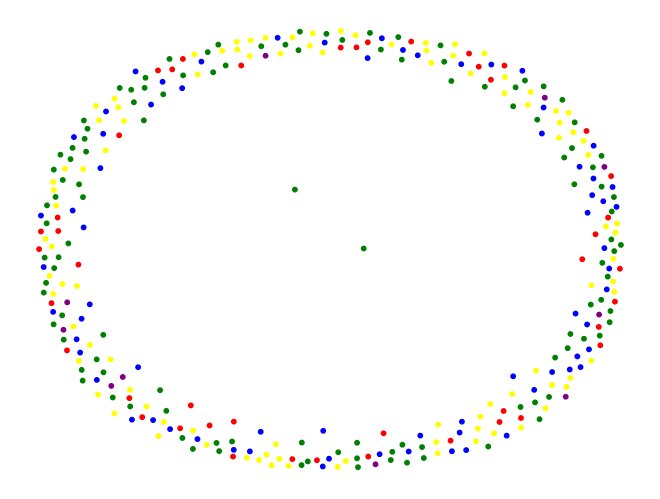

In [4]:
# Add all the nodes from the new_data, which is all the data that we will be looking at and color code them but region 

map = nx.Graph()

region_colors = {'United States':'red', 'Denmark':'blue',
                  'Brazil':'green', 'Japan':'purple', 'Nigeria':'yellow'}

for n, row in new_data.iterrows():
    map.add_node(n, song=row['track_name'], source = row['source'], 
                 artists=row['artist_names'], region = row['region'], 
                 color= region_colors.get(row['region']))

nx.draw(map, node_size=10, node_color=[map.nodes[n]['color'] for n in map.nodes()])

print(map.number_of_nodes())



In [5]:
# fuction to check to see if x is a list or not. If not then make it a comma sepervated list 
def ensure_list(x):
    if isinstance(x, list):
        return x
    elif isinstance(x, str):
        return [a.strip() for a in x.split(',')]
    else:
        return []


/var/folders/36/1rqs01tx7tb69pk6tttf8nrc0000gn/T/ipykernel_22382/2230112112.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmd['artist_names'] = bmd['artist_names'].apply(ensure_list)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127808 (\N{FOUR LEAF CLOVER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


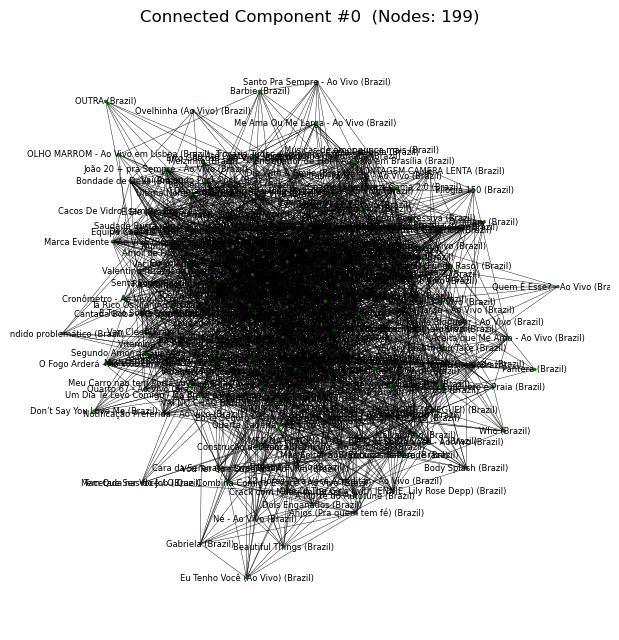

3041


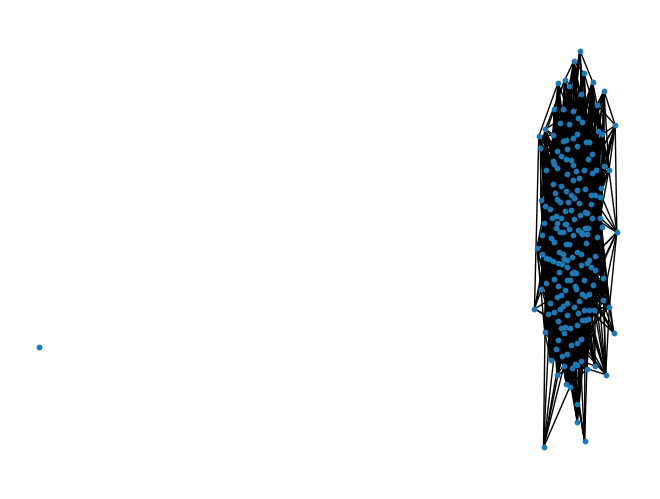

In [6]:
# Show the full graph of the sample data whcih includes the track_name, artist_names, and region 

bigMap = nx.Graph()

bmd = data[['track_name', 'artist_names', 'region']]
bmd['artist_names'] = bmd['artist_names'].apply(ensure_list)

# add nodes 
for n, row in bmd.iterrows():
    bigMap.add_node(n, song=row['track_name'], artists=row['artist_names'], region = row['region'], color=region_colors.get(row['region'],'gray'))

# add edges if an only if the artist names match 
for i, row_i in bmd.iterrows():
    for j, row_j in bmd.iterrows():
        if i < j:  
            if set(row_i['artist_names']) & set(row_j['artist_names']):  # check for intersection
                bigMap.add_edge(i, j)

connected_components = list(nx.connected_components(bigMap))
subgraphs5 = []

for component in connected_components:
    if len(component) > 4:
        sg5 = bigMap.subgraph(component).copy()
        subgraphs5.append(sg5)

for i, sg in enumerate(subgraphs5):

    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(sg5, seed=42)

    labels = {n: f"{sg.nodes[n]['song']} ({sg5.nodes[n]['region']})" for n in sg5.nodes()}

    nx.draw(
        sg5,
        pos,
        with_labels=True,
        labels=labels,
        node_size=2,  # size proportional to degree
        node_color=[sg5.nodes[n]['color'] for n in sg5.nodes()], 
        font_size=6,
        width=0.3
    )
    plt.title(f"Connected Component #{i}  (Nodes: {len(sg5.nodes())})")
    plt.show()



nx.draw(bigMap, with_labels = False, labels = nx.get_node_attributes(bigMap, 'artists' ), node_size = 10)
print(bigMap.number_of_edges())



942


/var/folders/36/1rqs01tx7tb69pk6tttf8nrc0000gn/T/ipykernel_22382/2388584349.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['artist_names'] = sample_data['artist_names'].apply(ensure_list)


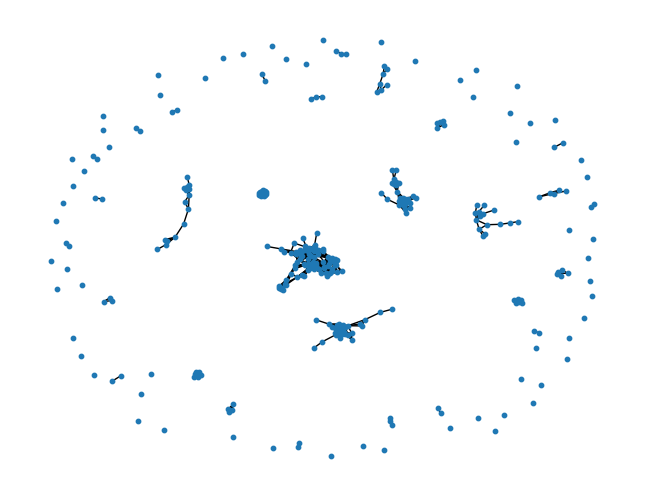

In [7]:
# Show the full graph of the sample data whcih includes the track_name, artist_names, and region 

sample = nx.Graph()

sample_data = new_data[['track_name', 'artist_names', 'region']]
sample_data['artist_names'] = sample_data['artist_names'].apply(ensure_list)

# add nodes 
for n, row in sample_data.iterrows():
    sample.add_node(n, song=row['track_name'], artists=row['artist_names'], 
                    region = row['region'], color=region_colors.get(row['region'],'gray'))

# add edges if an only if the artist names match 
for i, row_i in sample_data.iterrows():
    for j, row_j in sample_data.iterrows():
        if i < j:  
            if set(row_i['artist_names']) & set(row_j['artist_names']):  # check for intersection
                sample.add_edge(i, j)

nx.draw(sample, with_labels = False, labels = nx.get_node_attributes(sample, 'artists' ), node_size = 10)
print(sample.number_of_edges())



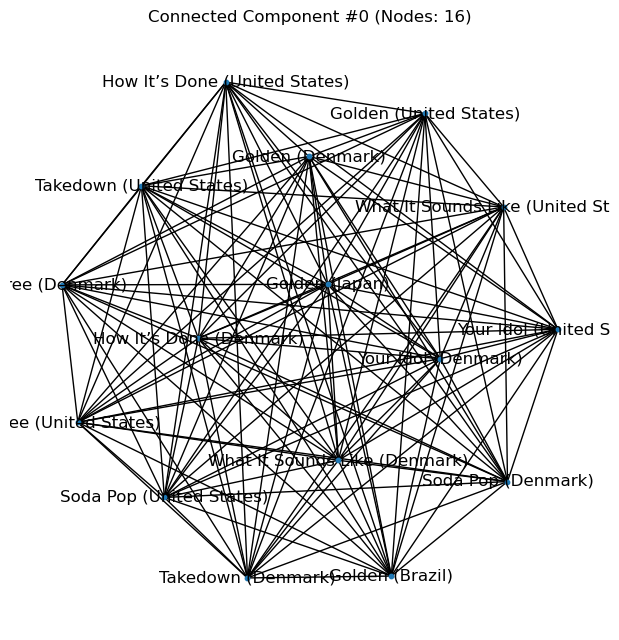

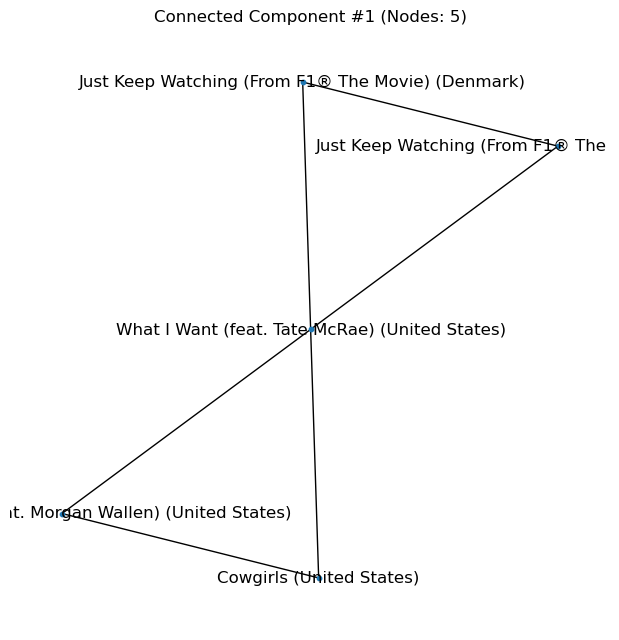

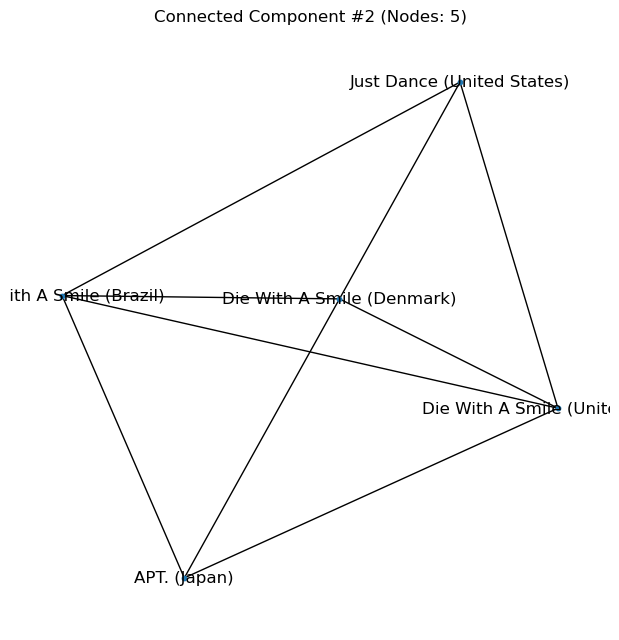

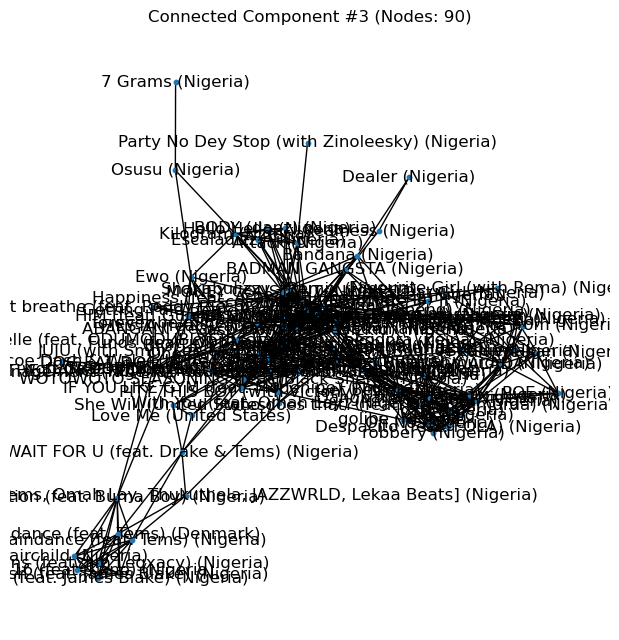

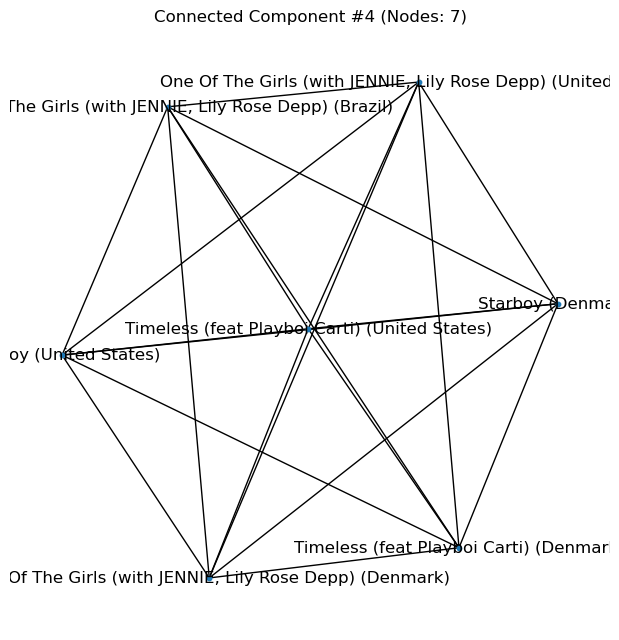

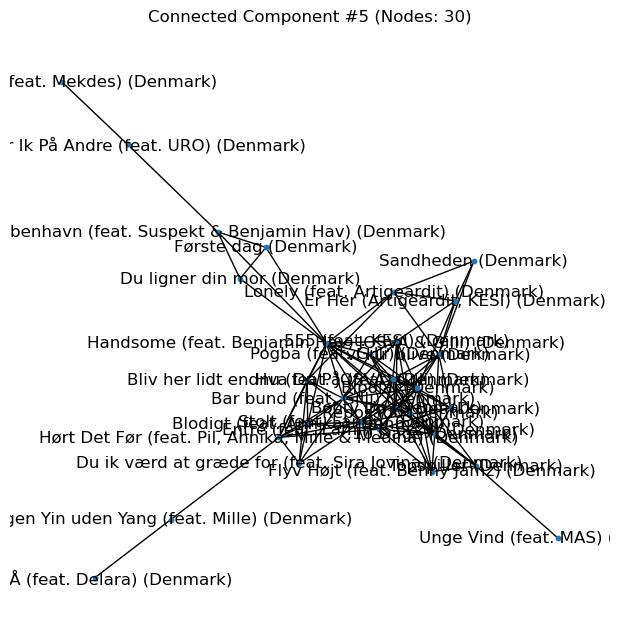

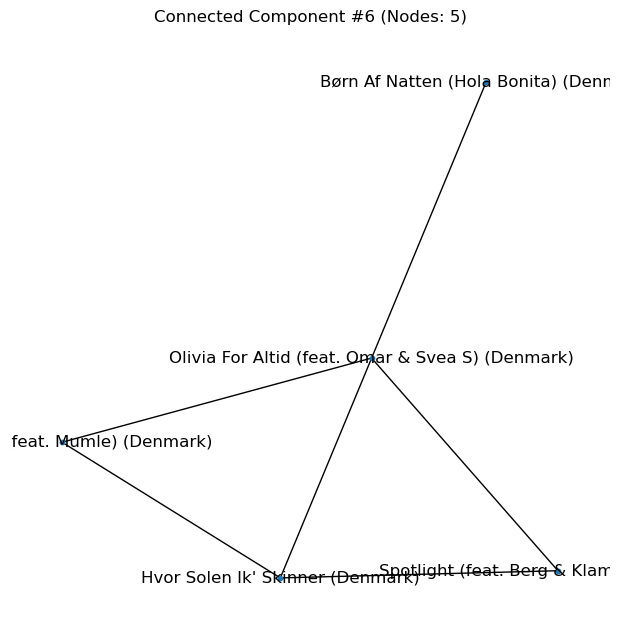

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127808 (\N{FOUR LEAF CLOVER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


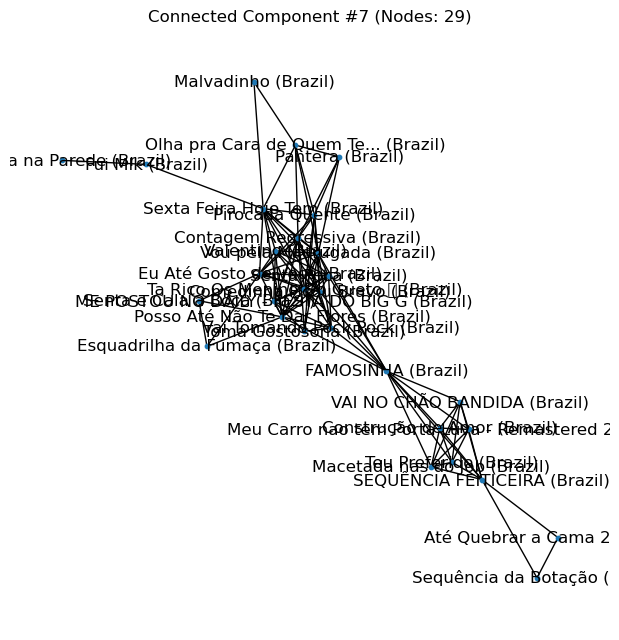

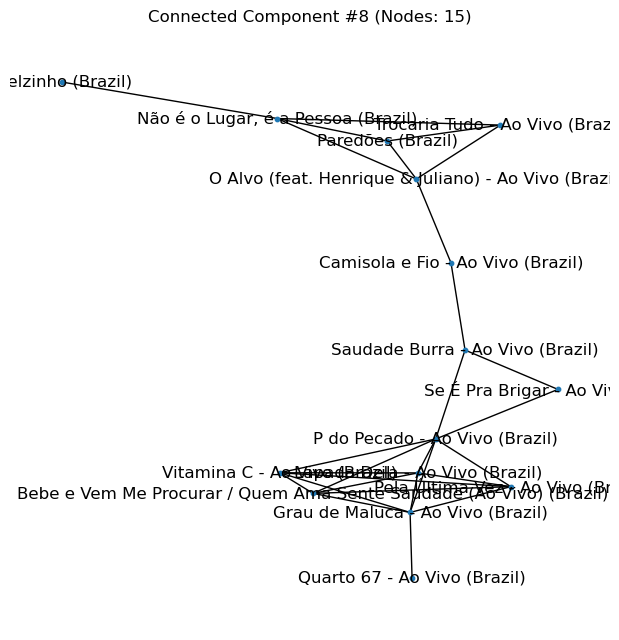

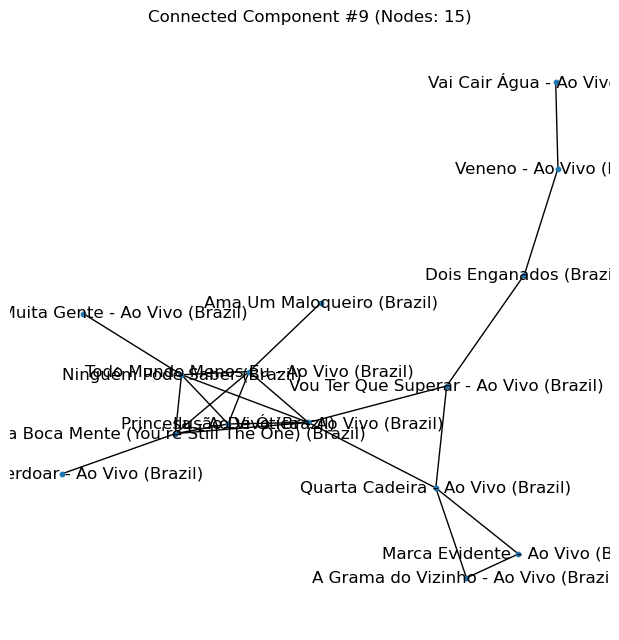

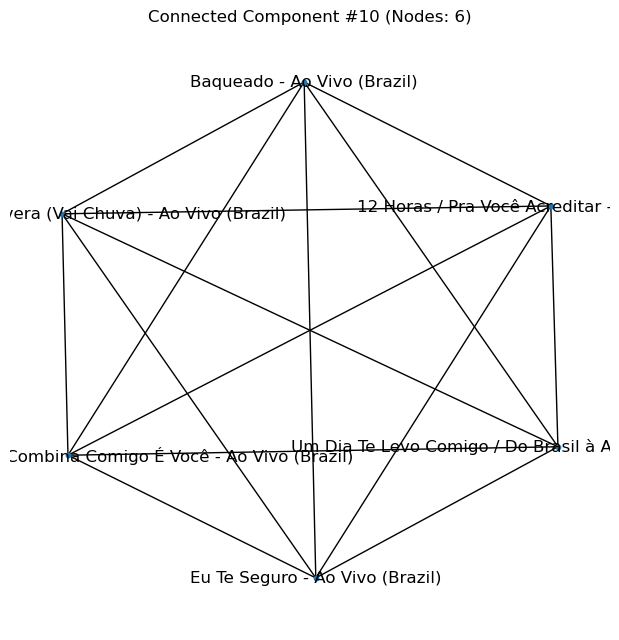

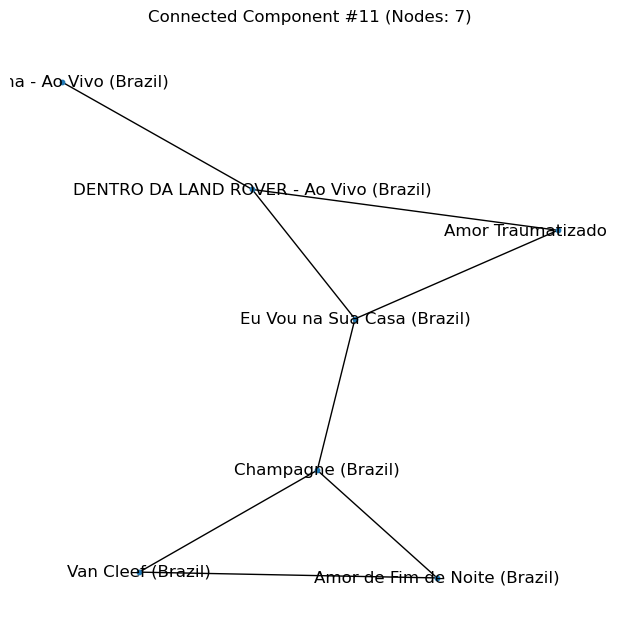

({320, 296, 327}, {264, 228, 269, 246})


In [8]:
# take the sample and extract only the connected compones with 4 or more nodes

from networkx.algorithms.community import girvan_newman

# get the connected componets and only print those in a subgraph 
connected_components = list(nx.connected_components(sample))
subgraphs = []

for component in connected_components:
    if len(component) > 4:
        sg = sample.subgraph(component).copy()
        subgraphs.append(sg)

for i, sg in enumerate(subgraphs):

    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(sg, seed=42)

    labels = {n: f"{sg.nodes[n]['song']} ({sg.nodes[n]['region']})" for n in sg.nodes()}

    nx.draw(sg, pos, with_labels=True, labels=labels, node_size=10)

    plt.title(f"Connected Component #{i} (Nodes: {len(sg.nodes())})")
    plt.show()



# dc = nx.degree_centrality(sg)

# B = nx.Graph()

# for idx, row in thor.iterrows():
#     song_node = f"song_{idx}"
#     country_node = f"country_{row['region']}"

#     B.add_node(song_node, type="song", song=row['track_name'])
#     B.add_node(country_node, type="country")

#     # Add edge song -> region
#     B.add_edge(song_node, country_node)

# nx.draw(B)

communities = next(girvan_newman(sg))
print(communities)


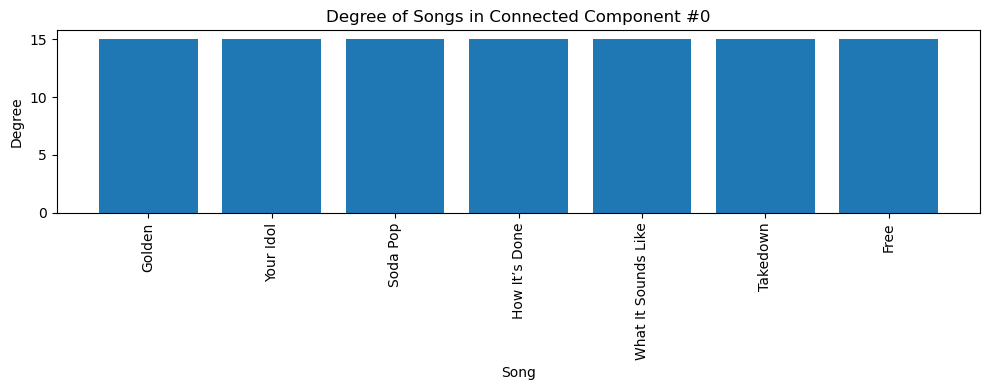

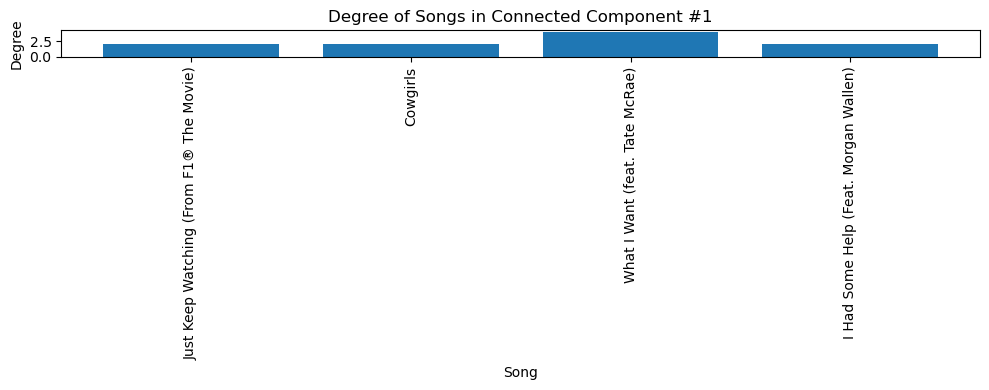

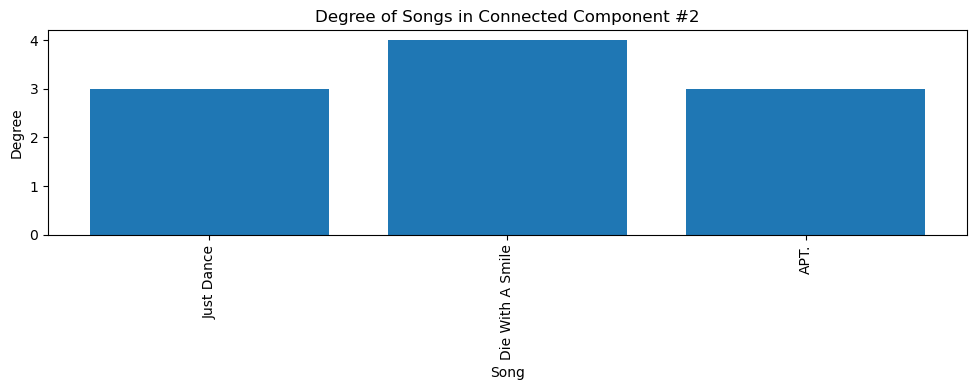

/var/folders/36/1rqs01tx7tb69pk6tttf8nrc0000gn/T/ipykernel_22382/2444519901.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


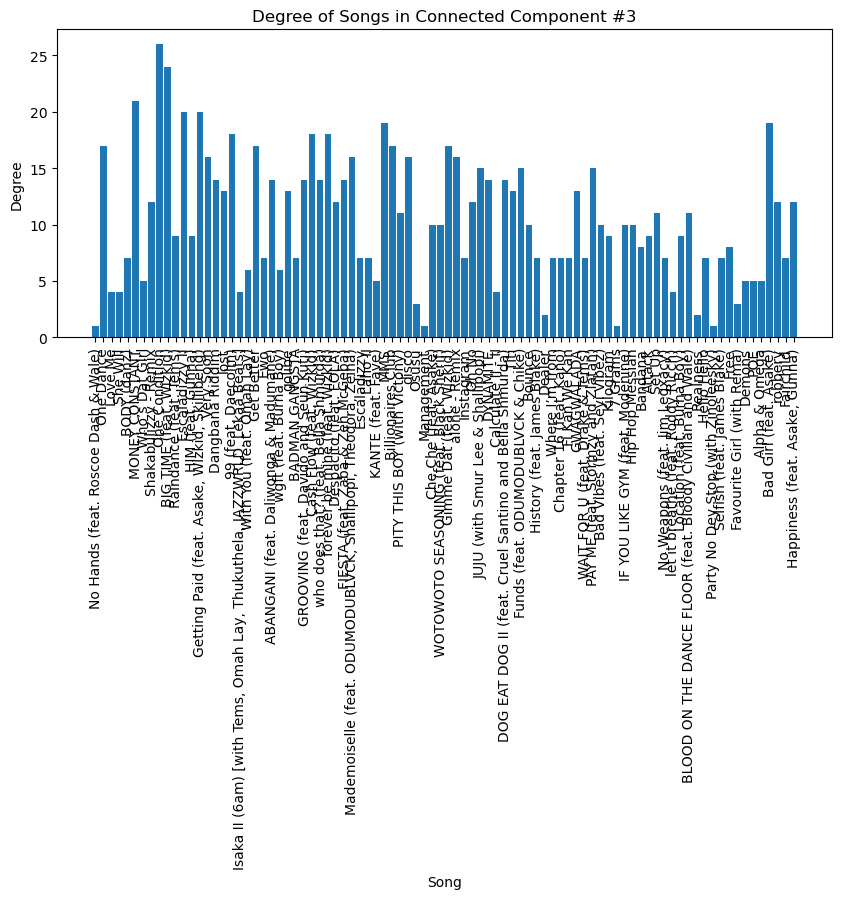

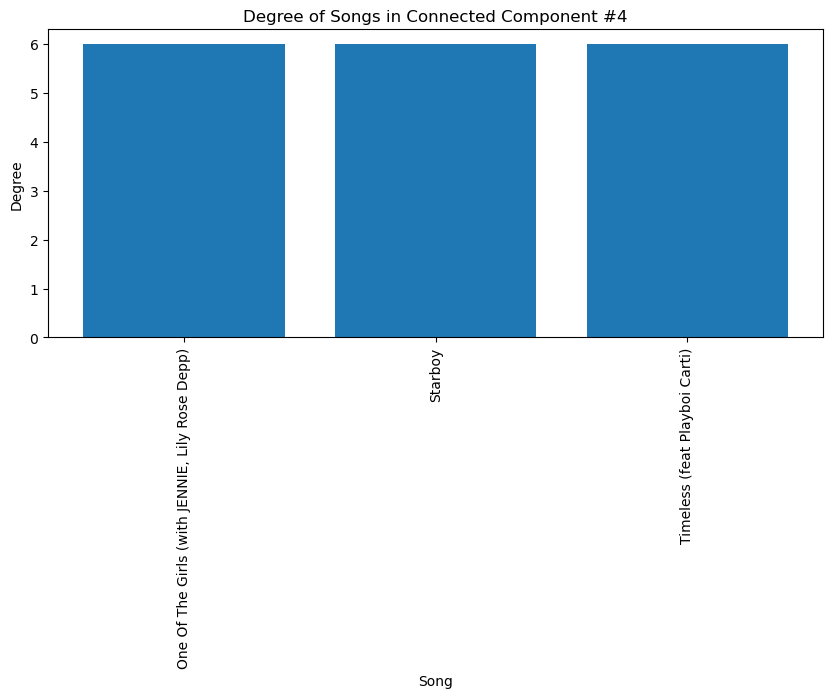

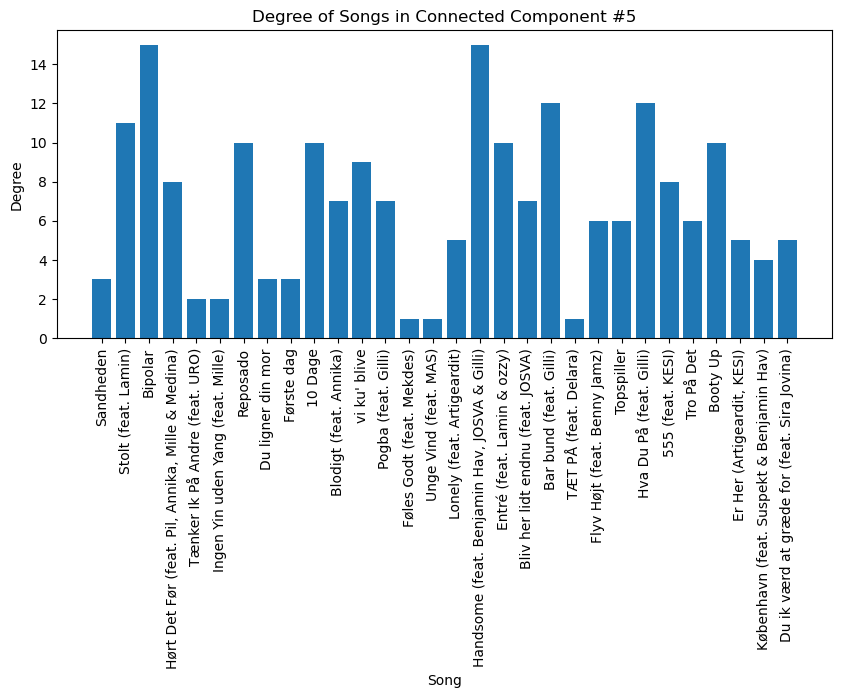

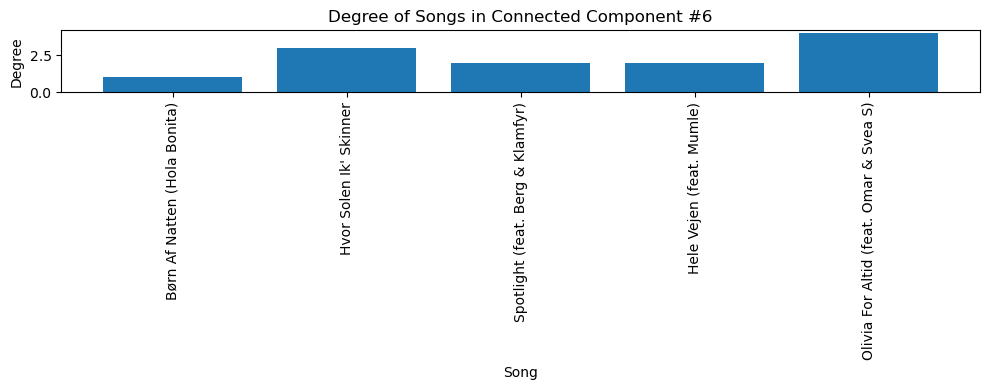

/var/folders/36/1rqs01tx7tb69pk6tttf8nrc0000gn/T/ipykernel_22382/2444519901.py:14: UserWarning: Glyph 127808 (\N{FOUR LEAF CLOVER}) missing from current font.
  plt.tight_layout()


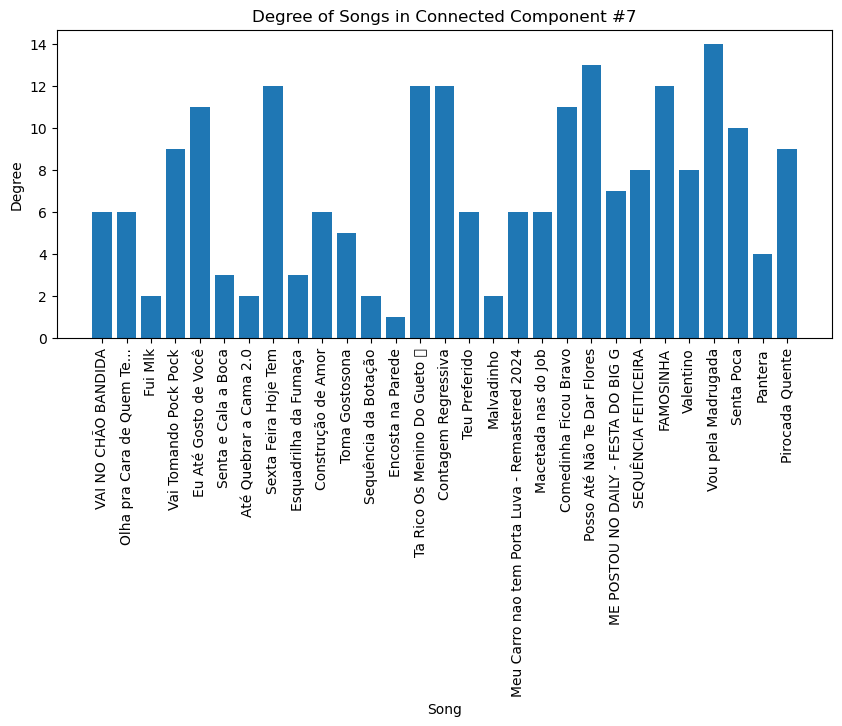

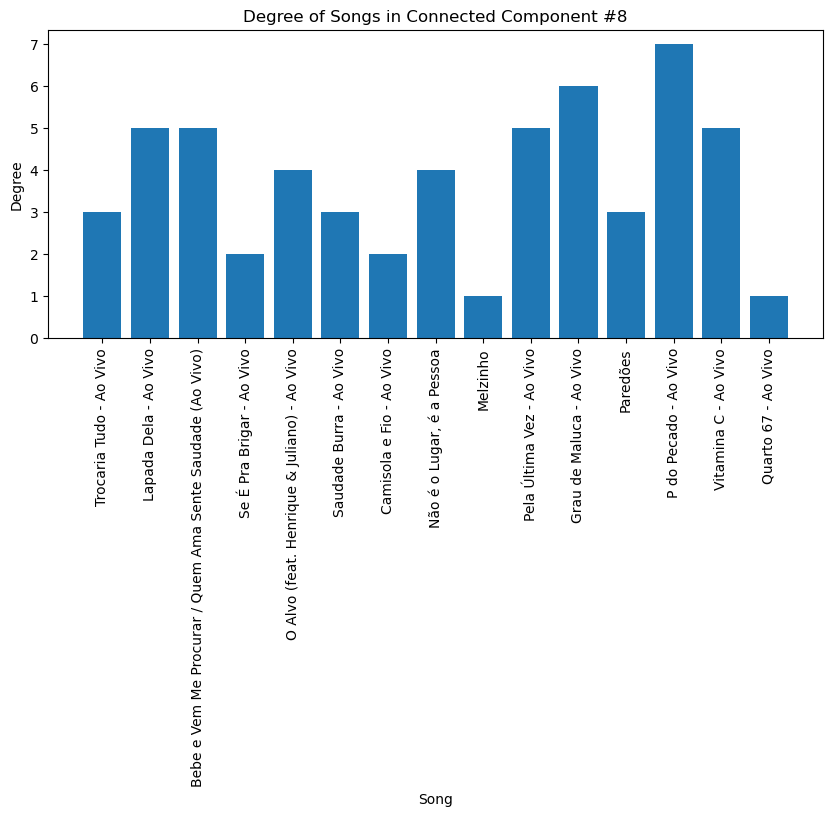

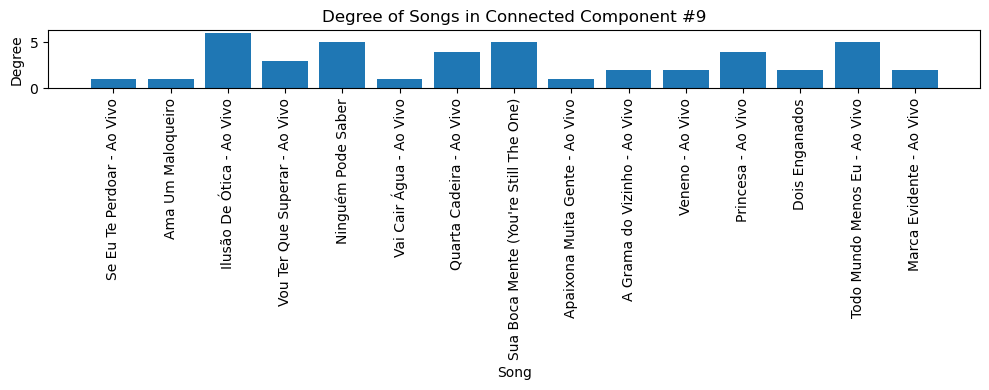

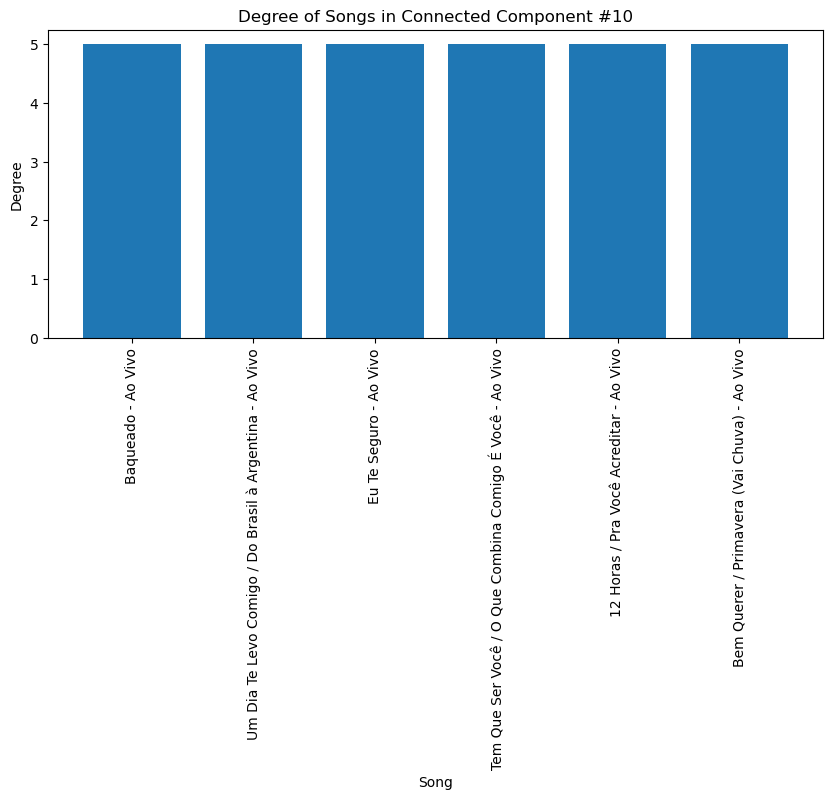

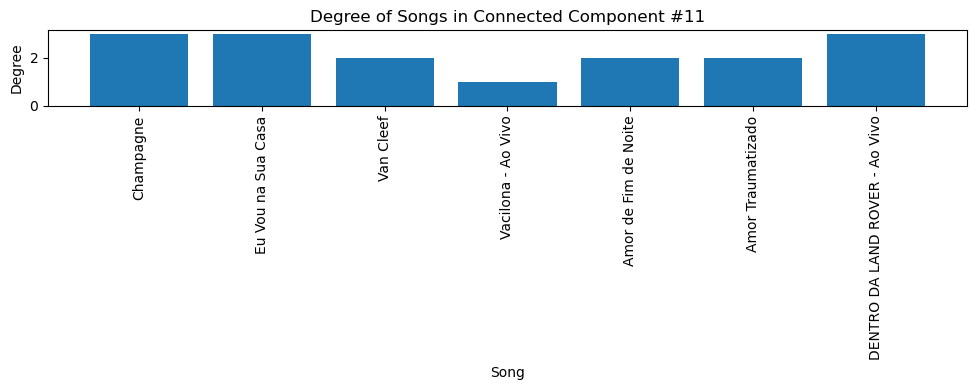

In [9]:
#Degree Bar Chart 

for i, sg in enumerate(subgraphs):
    degrees = dict(sg.degree())
    song_names = [sg.nodes[n]['song'] for n in sg.nodes()]
    degree_values = [degrees[n] for n in sg.nodes()]

    plt.figure(figsize=(10, 4))
    plt.bar(song_names, degree_values)
    plt.xticks(rotation=90)
    plt.title(f"Degree of Songs in Connected Component #{i}")
    plt.xlabel("Song")
    plt.ylabel("Degree")
    plt.tight_layout()
    plt.show()

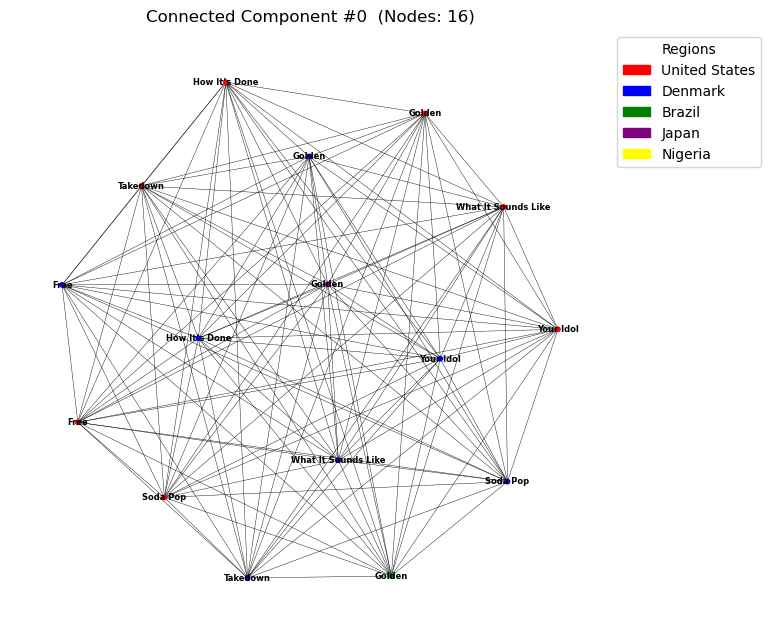

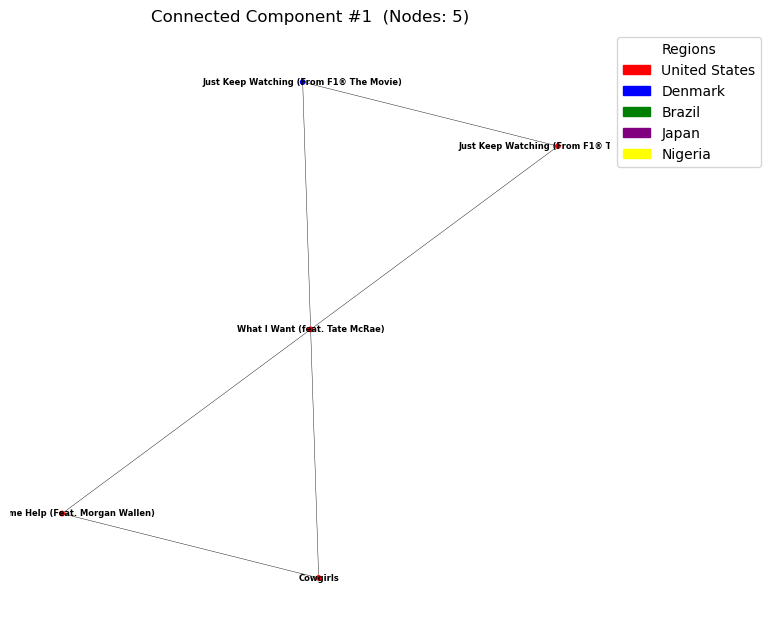

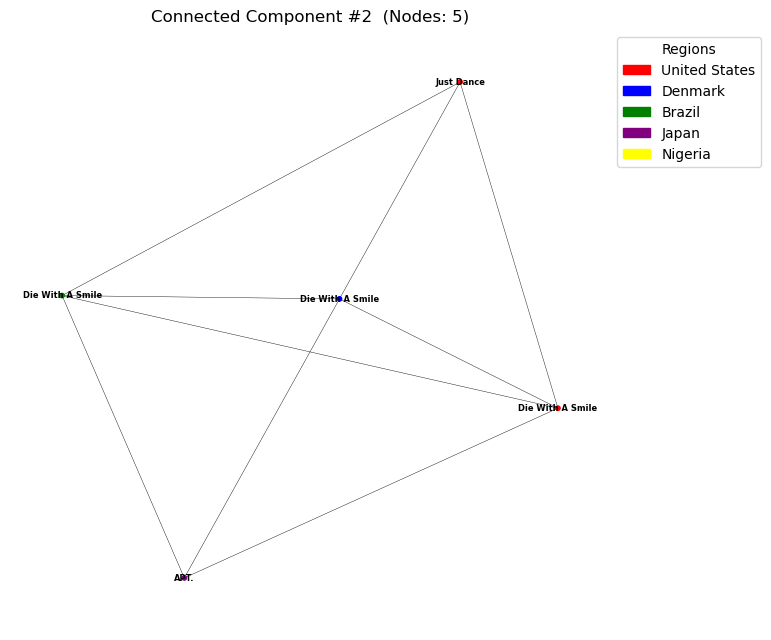

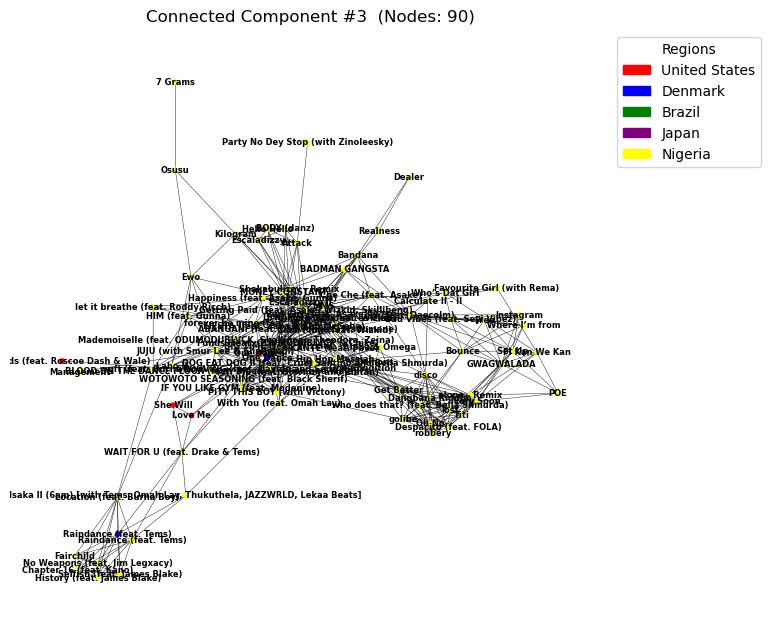

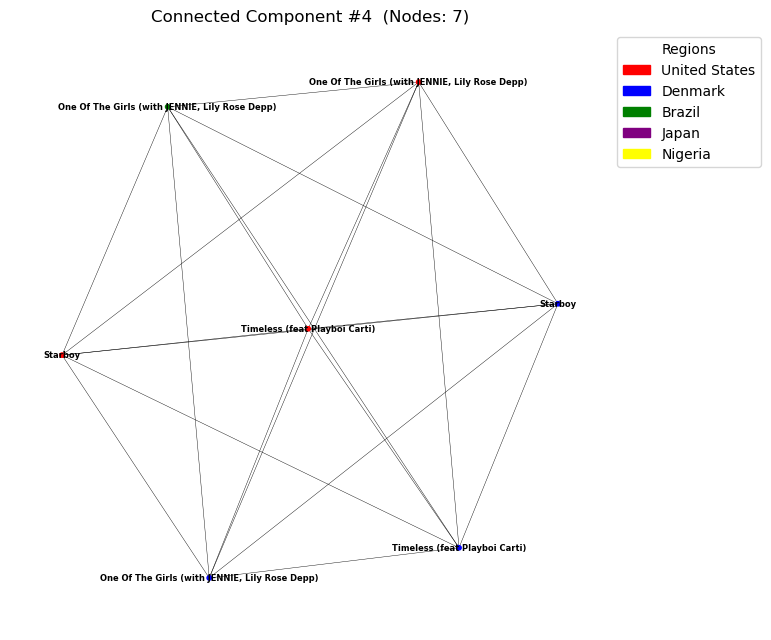

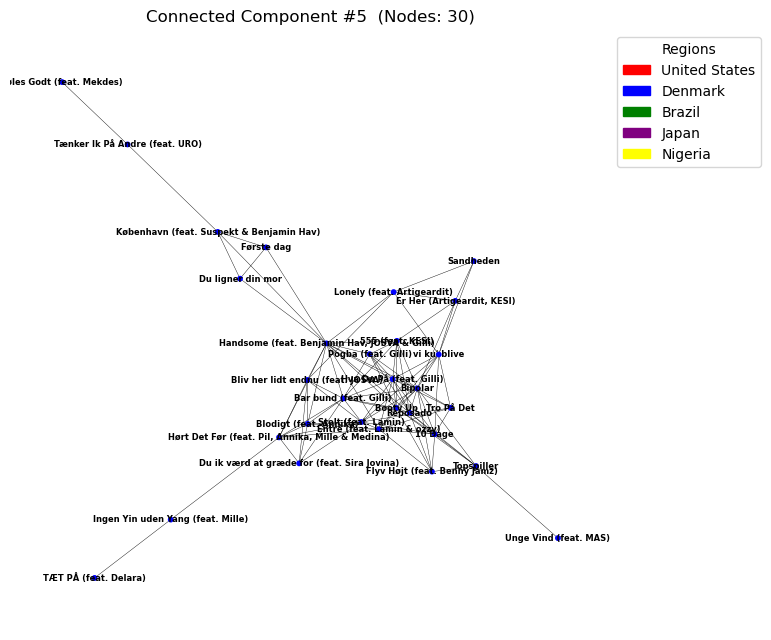

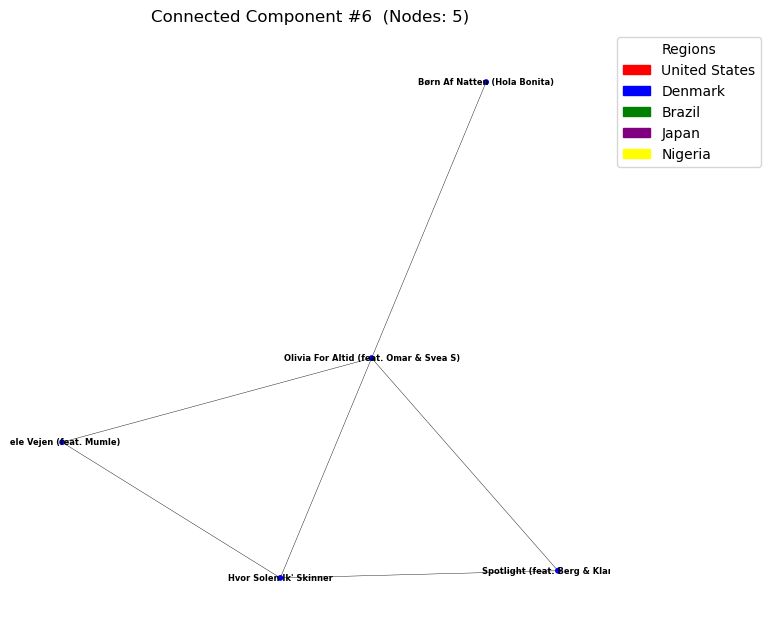

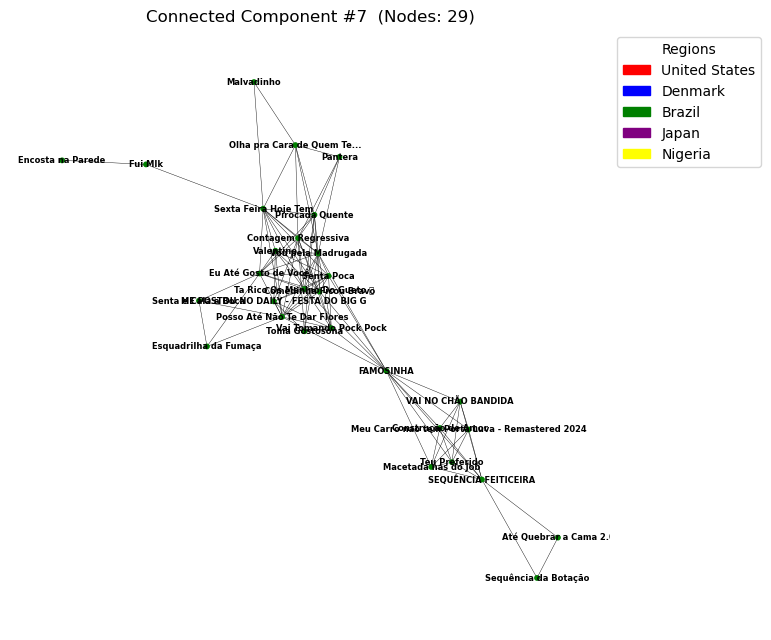

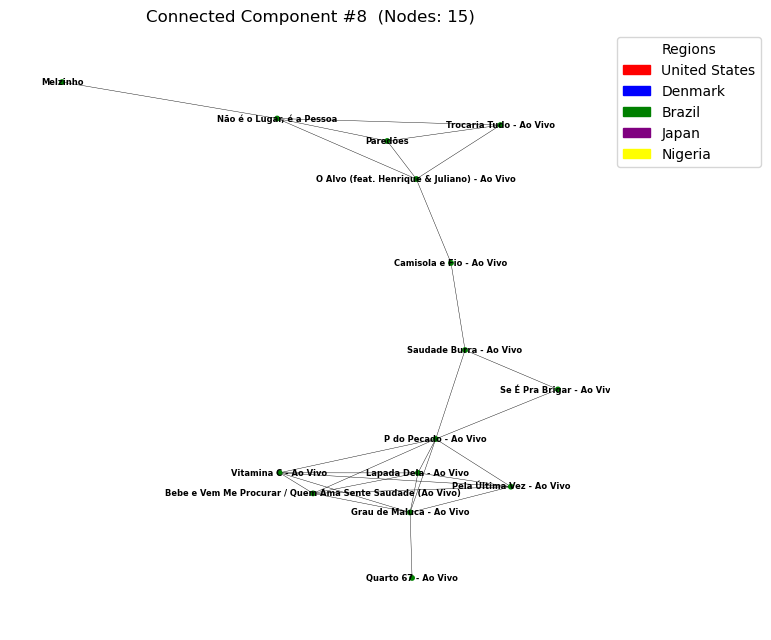

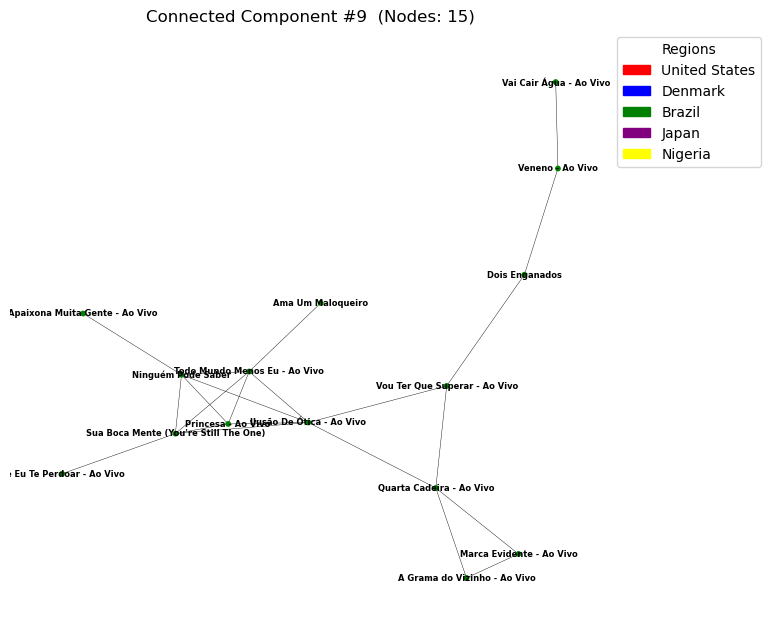

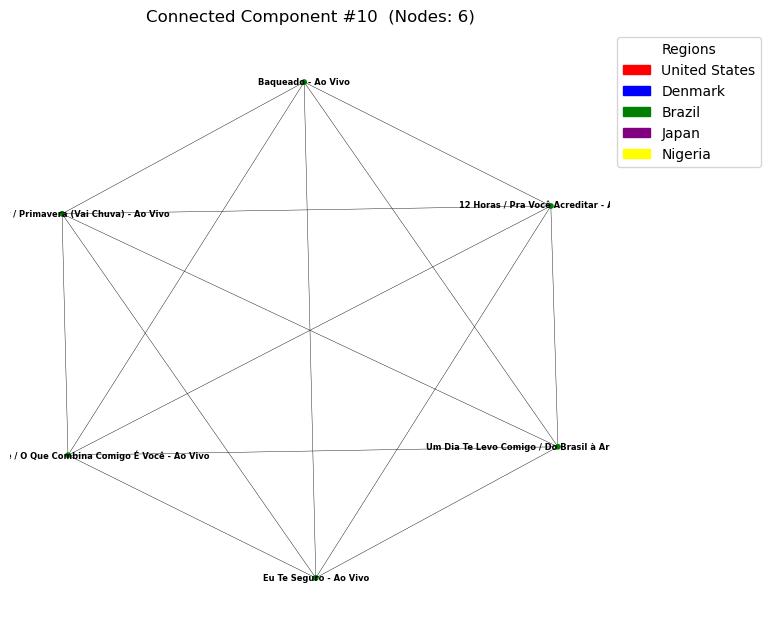

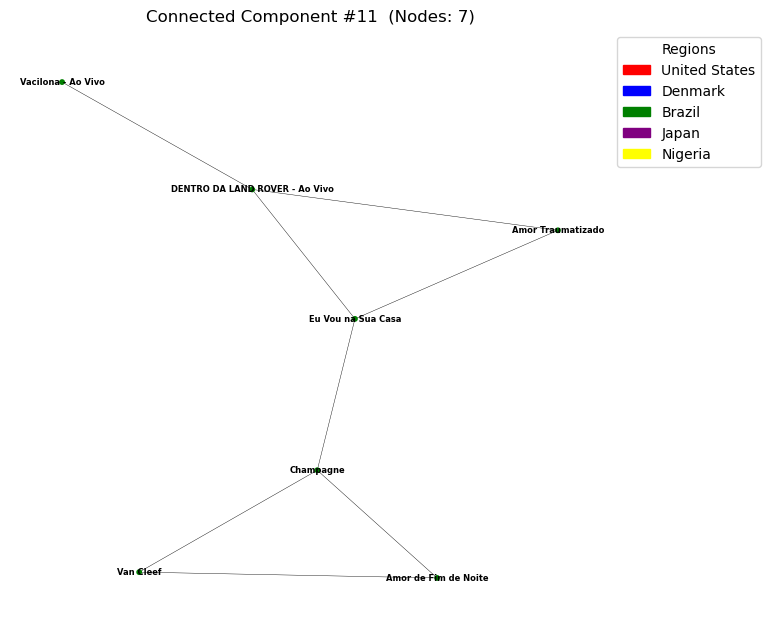

In [10]:
map = nx.Graph()

region_colors = {'United States':'red', 'Denmark':'blue', 'Brazil':'green', 'Japan':'purple', 'Nigeria':'yellow'}

for n, row in new_data.iterrows():
    map.add_node(n, song=row['track_name'], source = row['source'], artists=row['artist_names'], region = row['region'], color=region_colors.get(row['region'],'gray'))


for i, row_i in new_data.iterrows():
    for j, row_j in new_data.iterrows():
        if i < j:  
            if set(row_i['artist_names']) & set(row_j['artist_names']):  # check for intersection
                map.add_edge(i, j)

# for i, row_i in new_data.iterrows():
#     for j, row_j in new_data.iterrows():
#         if i < j:
#             pattern = r'\b' + re.escape(row_i['artist_names']) + r'\b'
#             if bool(re.search(pattern, row_j['artist_names'])):
#                 map.add_edge(i, j)



connected_components = list(nx.connected_components(map))
subgraphs2 = []  # list to store each subgraph

for component in connected_components:
    if len(component) > 4:
        sg2 = map.subgraph(component).copy()
        subgraphs2.append(sg2)

for i, sg2 in enumerate(subgraphs):
    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(sg2, seed=42)

    # Get labels
    labels = nx.get_node_attributes(sg2, 'song')  # or 'song'

    # # Compute node sizes based on degree
    # degrees = dict(sg.degree())  # node -> number of edges
    # node_sizes = [degrees[n] * 50 for n in sg.nodes()]  # scale factor 50

    nx.draw(
        sg2,
        pos,
        with_labels=True,
        labels=labels,
        node_size=10,  # size proportional to degree
        node_color=[sg2.nodes[n]['color'] for n in sg2.nodes()], 
        font_size=6,
        font_weight = "bold",
        width=0.3
    )

    legend_patches = [
        mpatches.Patch(color=color, label=region)
        for region, color in region_colors.items()
    ]

    plt.legend(
        handles=legend_patches,
        title="Regions",
        loc="upper left",
        bbox_to_anchor=(1, 1)
    )

    plt.title(f"Connected Component #{i}  (Nodes: {len(sg2.nodes())})")
    plt.show()



# # Find the largest connected component
# largest_cc = max(connected_components, key=len)

# print("Largest connected component node indices:", largest_cc)


# # Subgraph of the largest connected component
# largest_subgraph = map.subgraph(largest_cc).copy()


# plt.figure(figsize=(10, 8))

# Draw nodes with song names as labels



# nx.draw(
#     largest_subgraph,
#     # node_color=[map.nodes[n]['color'] for n in map.nodes()],
#     # width = .01,
#     with_labels = True,
#     labels = nx.get_node_attributes(largest_subgraph, 'song')
#     # node_size =10
# )

# plt.title("Largest Connected Component of Songs by Shared Artists")
# plt.show()

# print(map.nodes[207])





In [11]:
groups = {}
for node, attrs in map.nodes(data=True):
    region = attrs['region']
    groups.setdefault(region, []).append(node)


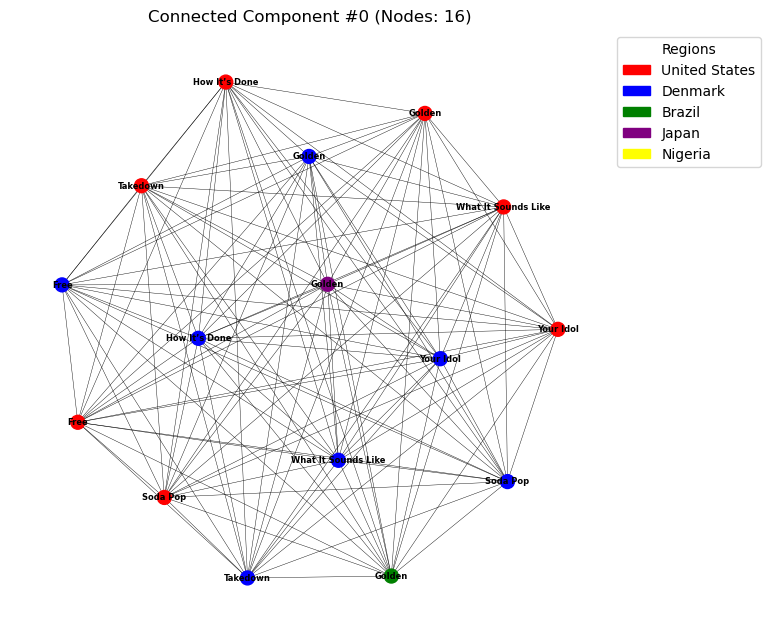


Top Betweenness Songs in Component #0:
Golden — 0.0000
Your Idol — 0.0000
Soda Pop — 0.0000
How It’s Done — 0.0000
What It Sounds Like — 0.0000


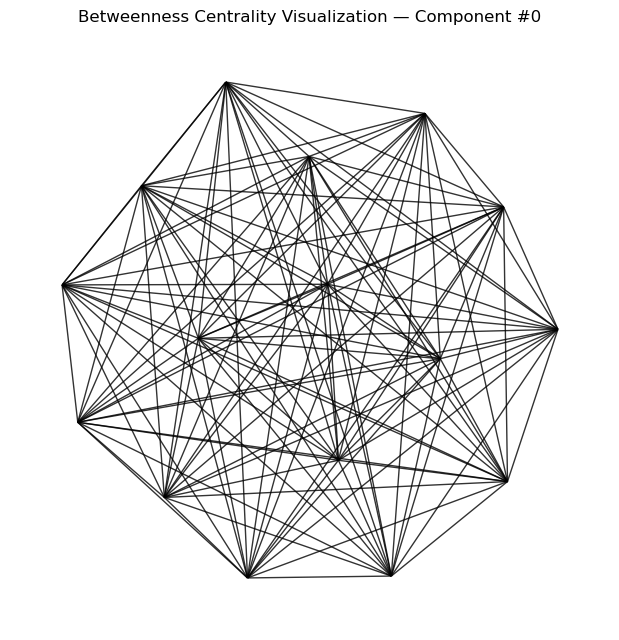

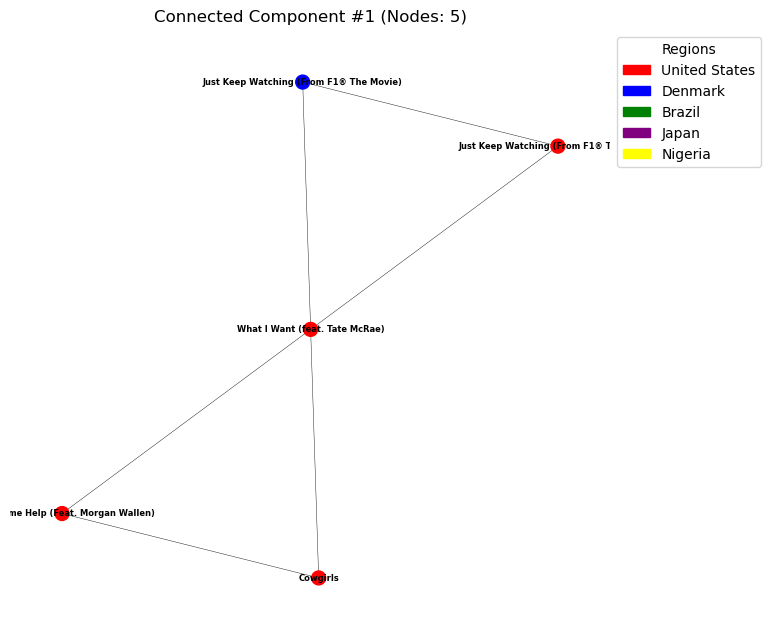


Top Betweenness Songs in Component #1:
What I Want (feat. Tate McRae) — 0.6667
Just Keep Watching (From F1® The Movie) — 0.0000
Cowgirls — 0.0000
I Had Some Help (Feat. Morgan Wallen) — 0.0000
Just Keep Watching (From F1® The Movie) — 0.0000


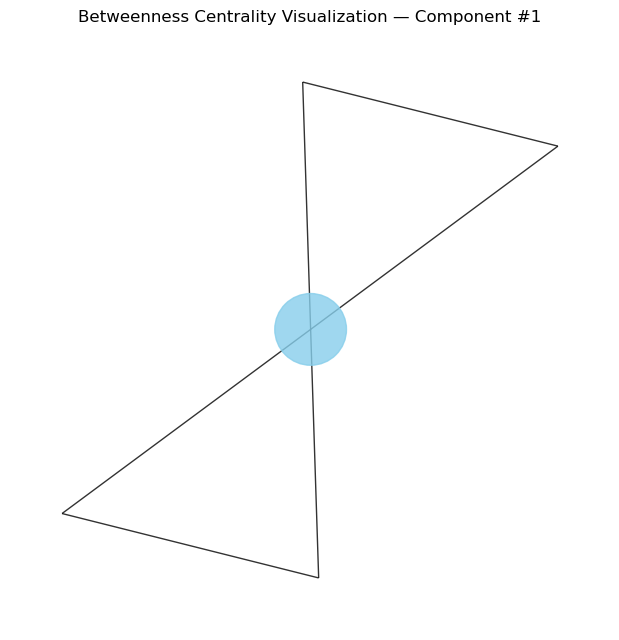

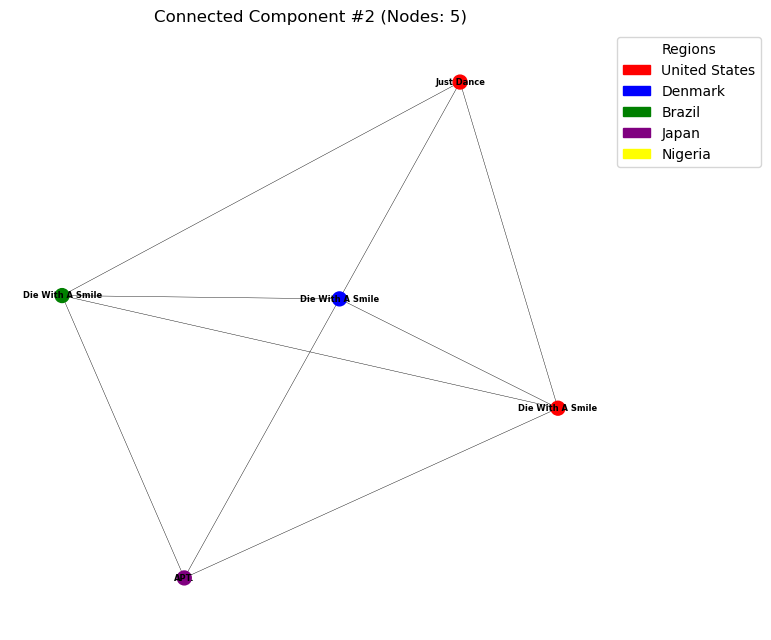


Top Betweenness Songs in Component #2:
Die With A Smile — 0.0556
Die With A Smile — 0.0556
Die With A Smile — 0.0556
Just Dance — 0.0000
APT. — 0.0000


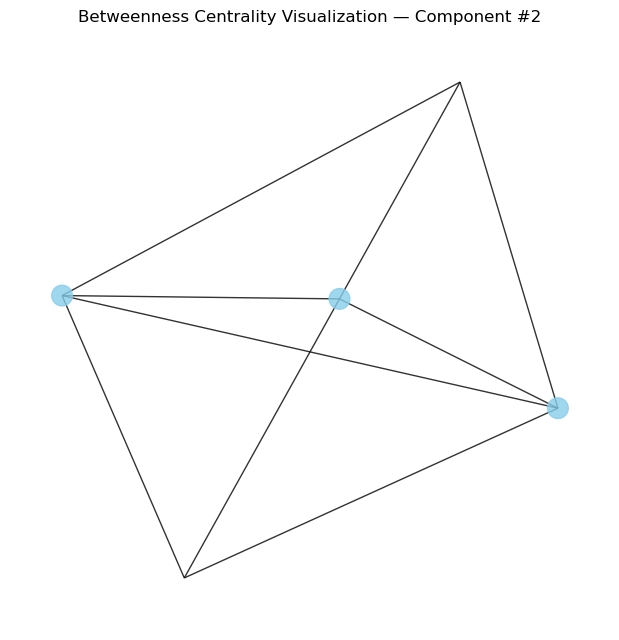

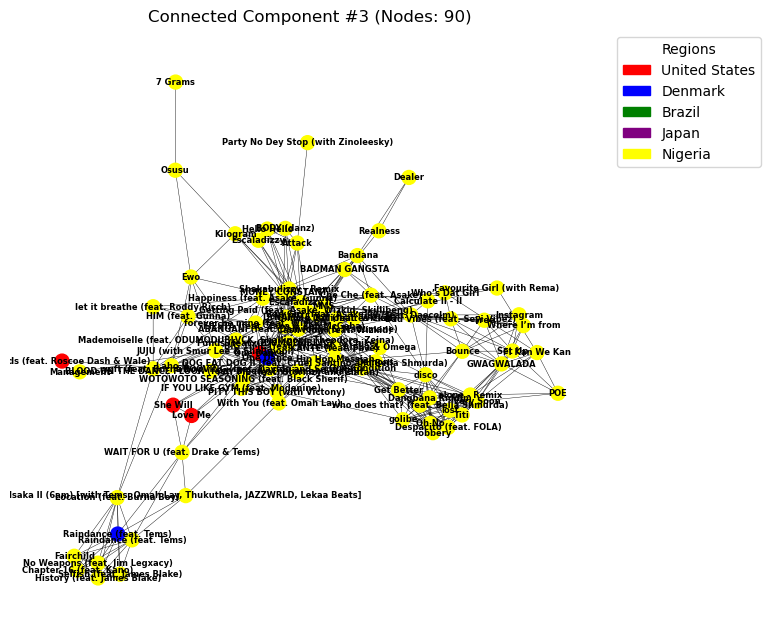


Top Betweenness Songs in Component #3:
Escaladizzy II — 0.1358
One Condition — 0.1059
BIG TIME (feat. Wizkid) — 0.0824
Location (feat. Burna Boy) — 0.0796
MONEY CONSTANT — 0.0736


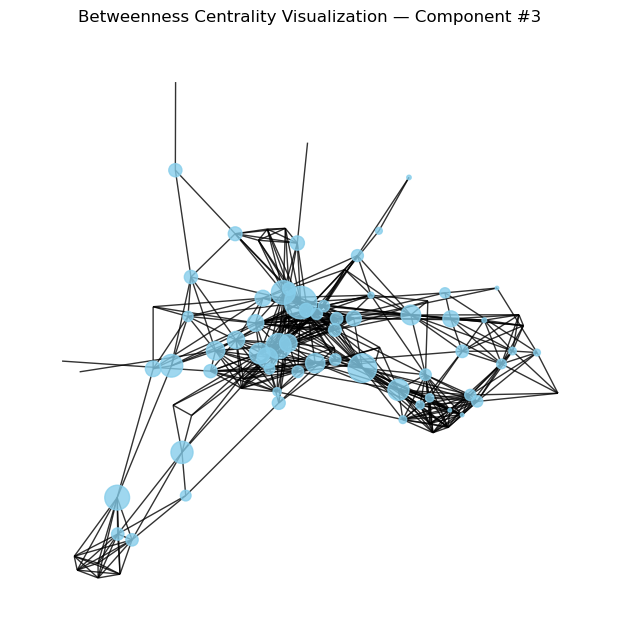

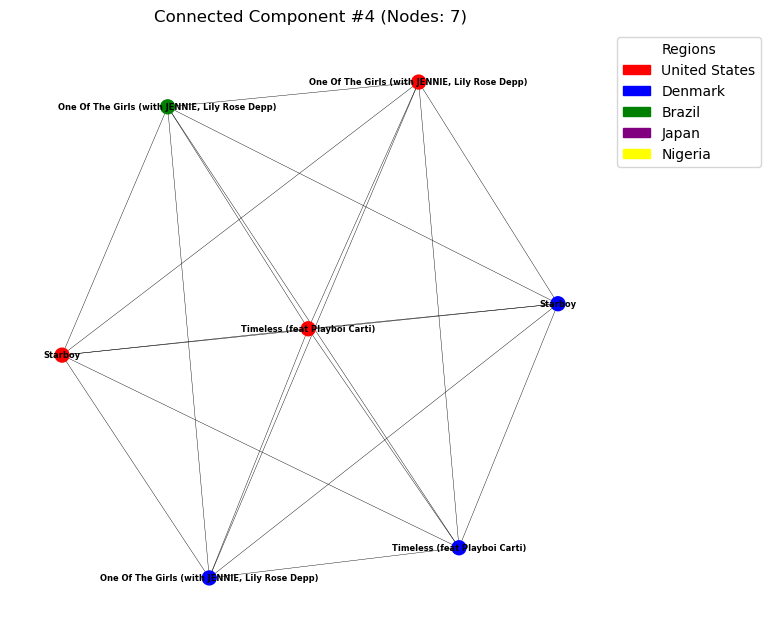


Top Betweenness Songs in Component #4:
One Of The Girls (with JENNIE, Lily Rose Depp) — 0.0000
Starboy — 0.0000
One Of The Girls (with JENNIE, Lily Rose Depp) — 0.0000
Starboy — 0.0000
Timeless (feat Playboi Carti) — 0.0000


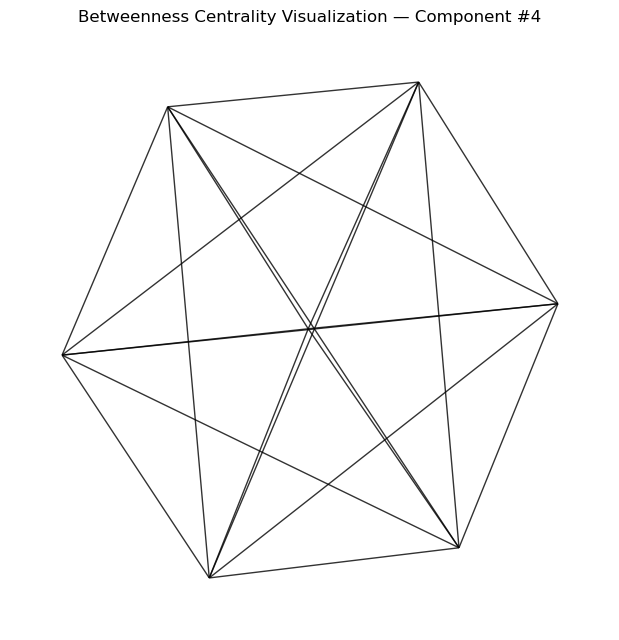

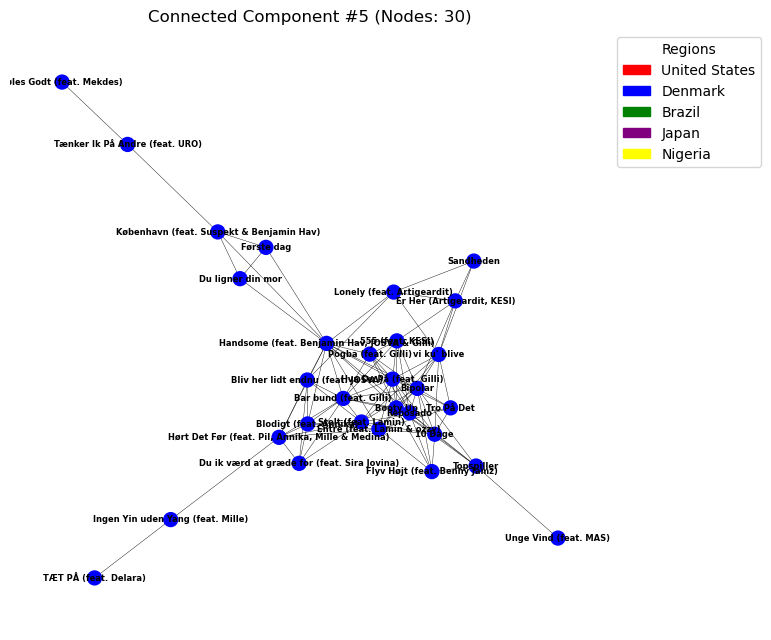


Top Betweenness Songs in Component #5:
Handsome (feat. Benjamin Hav, JOSVA & Gilli) — 0.3673
Hørt Det Før (feat. Pil, Annika, Mille & Medina) — 0.1412
København (feat. Suspekt & Benjamin Hav) — 0.1330
Bipolar — 0.1163
Tænker Ik På Andre (feat. URO) — 0.0690


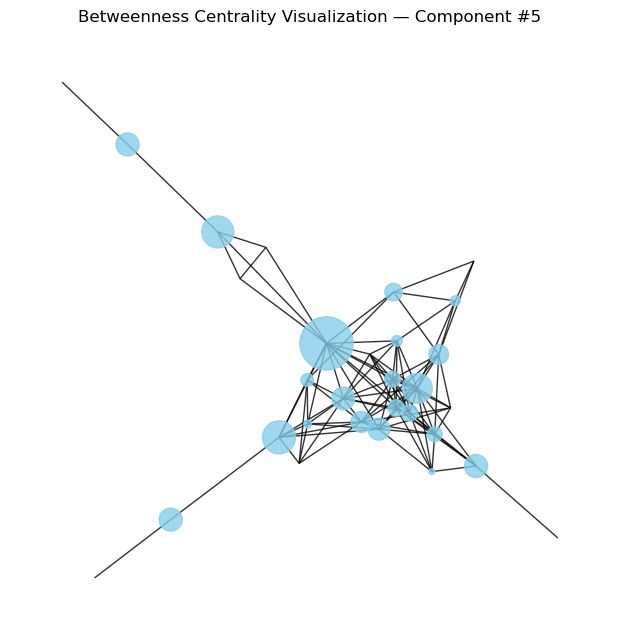

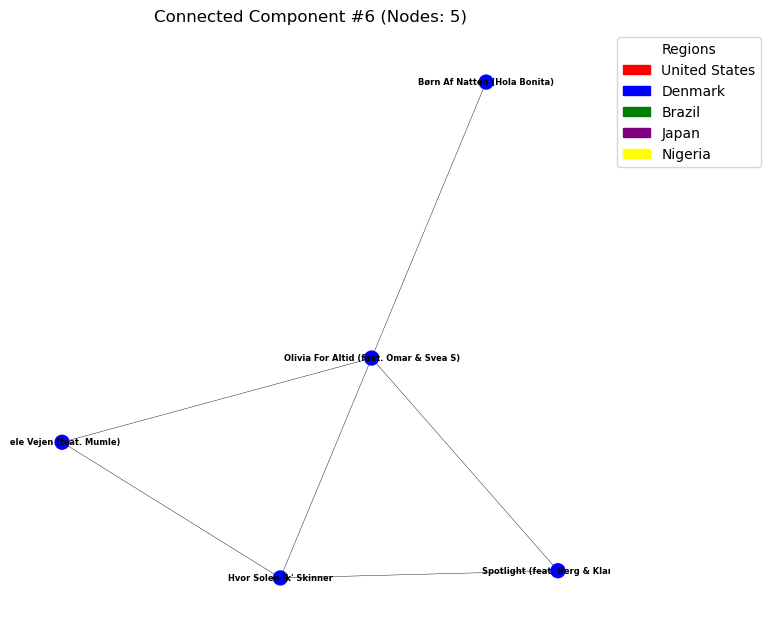


Top Betweenness Songs in Component #6:
Olivia For Altid (feat. Omar & Svea S) — 0.5833
Hvor Solen Ik' Skinner — 0.0833
Børn Af Natten (Hola Bonita) — 0.0000
Spotlight (feat. Berg & Klamfyr) — 0.0000
Hele Vejen (feat. Mumle) — 0.0000


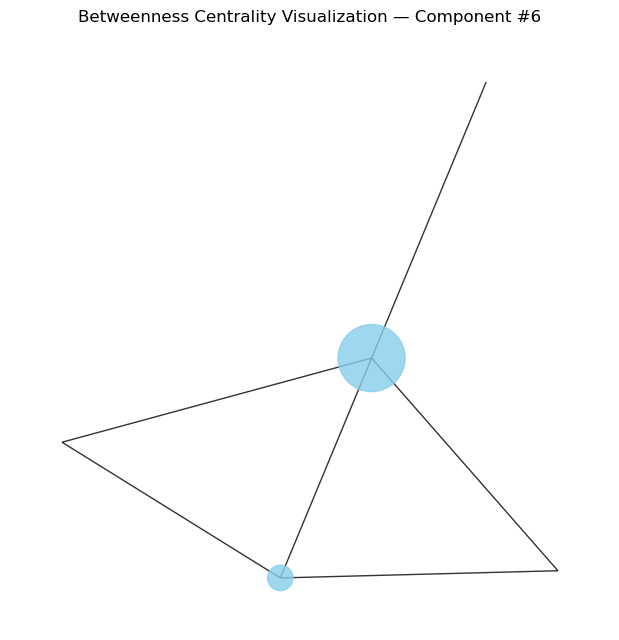

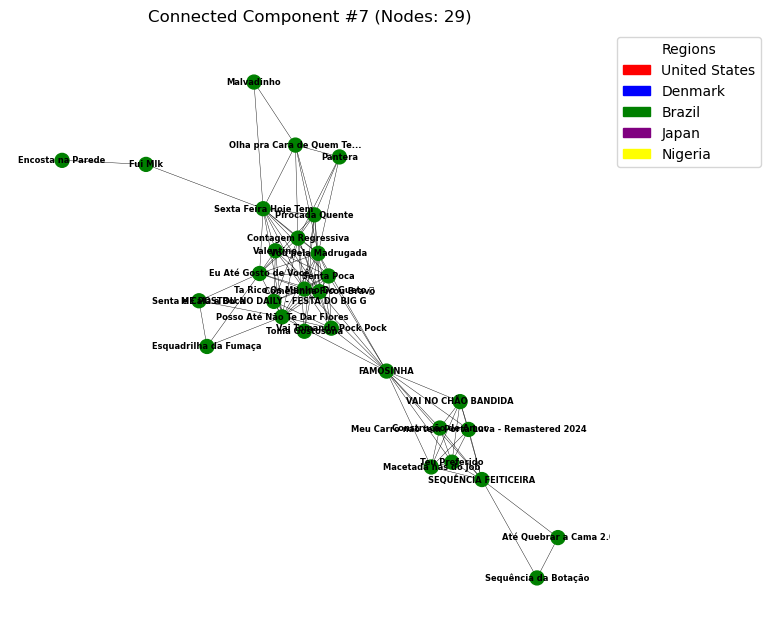


Top Betweenness Songs in Component #7:
FAMOSINHA — 0.4233
Sexta Feira Hoje Tem — 0.1973
Vou pela Madrugada — 0.1443
SEQUÊNCIA FEITICEIRA — 0.1376
Posso Até Não Te Dar Flores — 0.1372


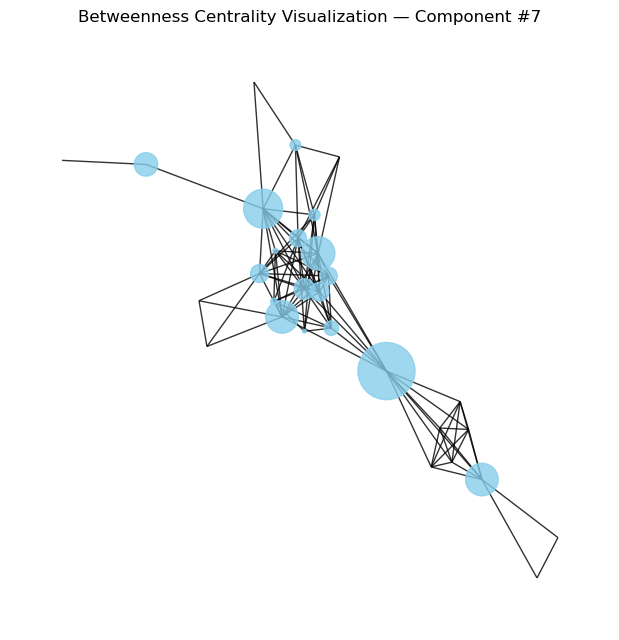

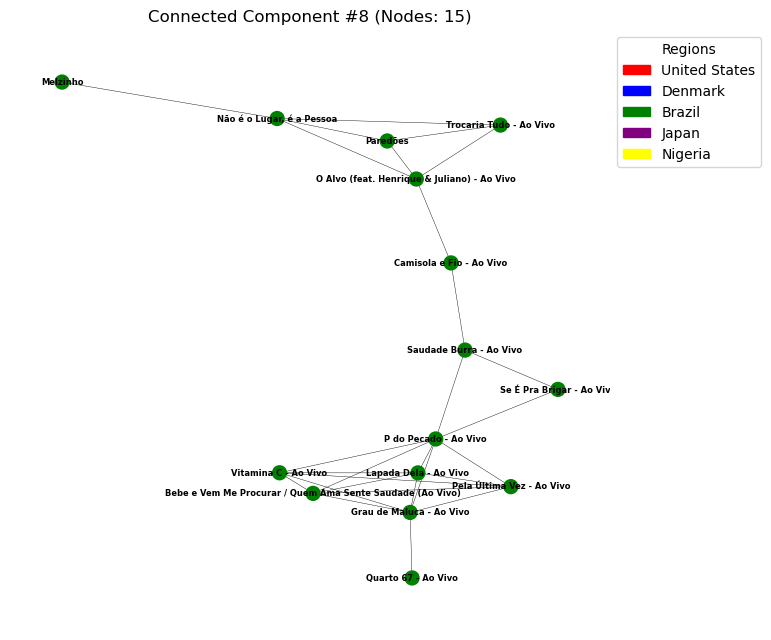


Top Betweenness Songs in Component #8:
Saudade Burra - Ao Vivo — 0.5275
P do Pecado - Ao Vivo — 0.5275
Camisola e Fio - Ao Vivo — 0.4945
O Alvo (feat. Henrique & Juliano) - Ao Vivo — 0.4396
Não é o Lugar, é a Pessoa — 0.1429


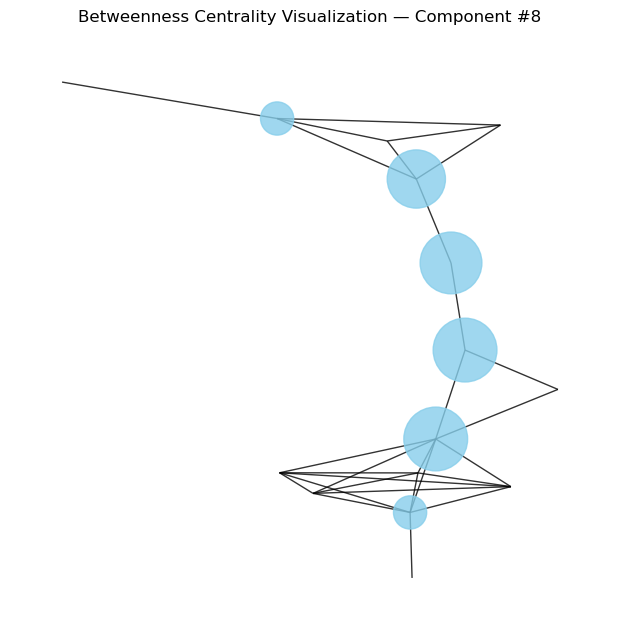

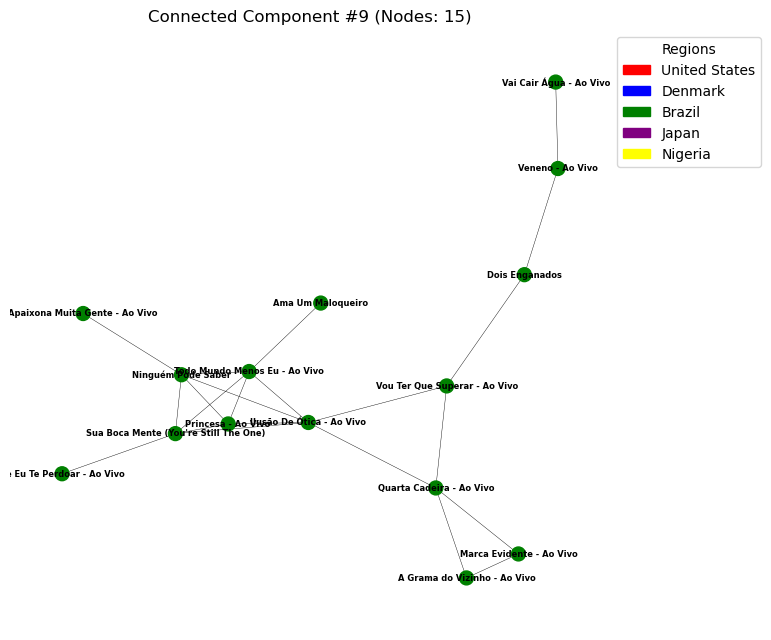


Top Betweenness Songs in Component #9:
Ilusão De Ótica - Ao Vivo — 0.5385
Vou Ter Que Superar - Ao Vivo — 0.3626
Quarta Cadeira - Ao Vivo — 0.2637
Dois Enganados — 0.2637
Ninguém Pode Saber — 0.1429


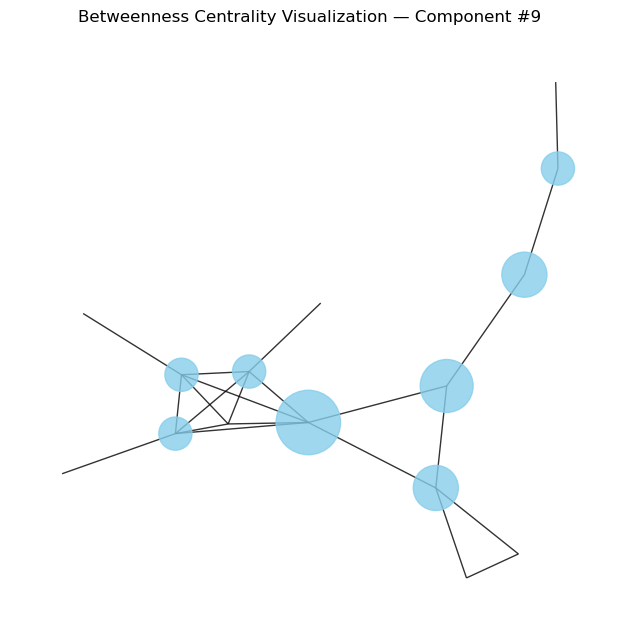

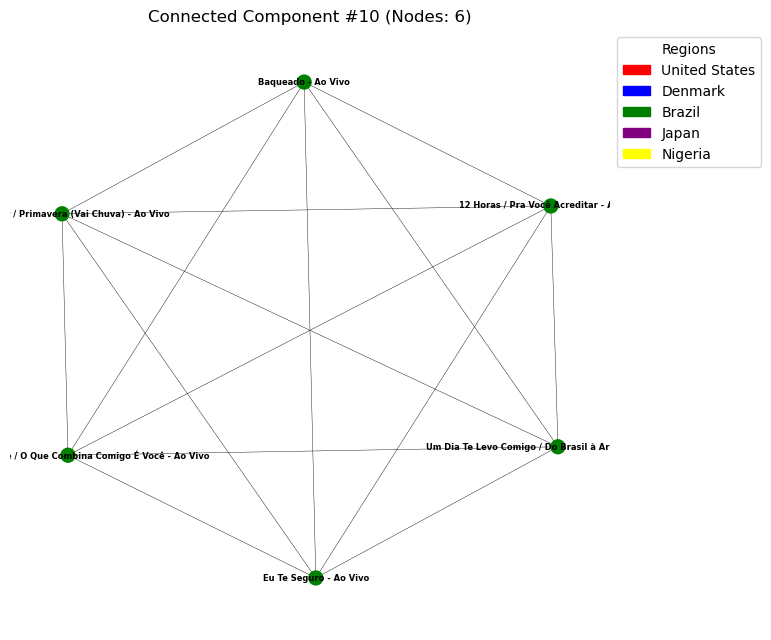


Top Betweenness Songs in Component #10:
Baqueado - Ao Vivo — 0.0000
Um Dia Te Levo Comigo / Do Brasil à Argentina - Ao Vivo — 0.0000
Eu Te Seguro - Ao Vivo — 0.0000
Tem Que Ser Você / O Que Combina Comigo É Você - Ao Vivo — 0.0000
12 Horas / Pra Você Acreditar - Ao Vivo — 0.0000


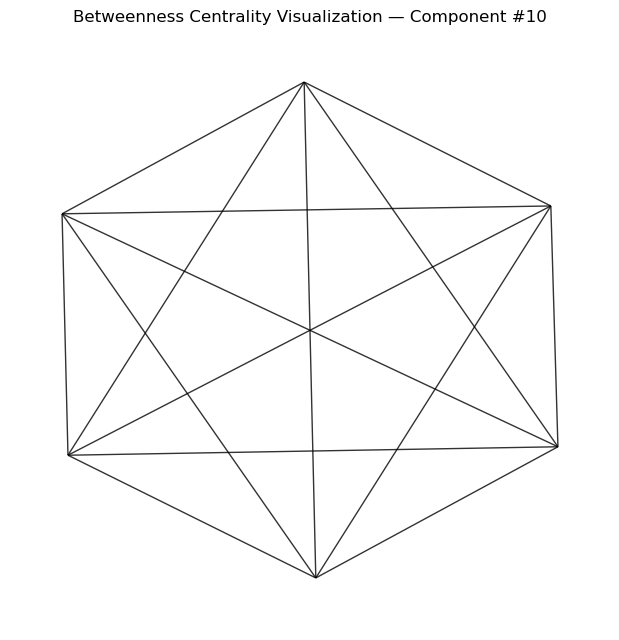

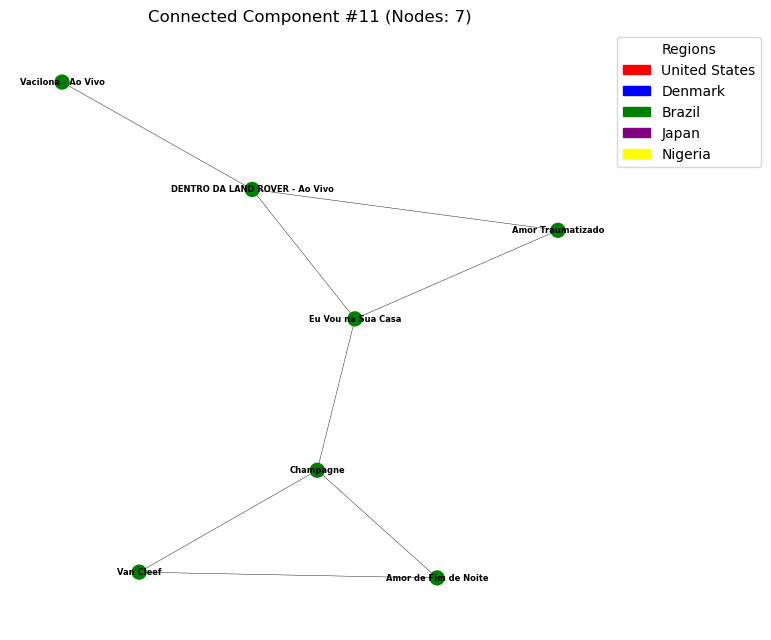


Top Betweenness Songs in Component #11:
Eu Vou na Sua Casa — 0.6000
Champagne — 0.5333
DENTRO DA LAND ROVER - Ao Vivo — 0.3333
Van Cleef — 0.0000
Vacilona - Ao Vivo — 0.0000


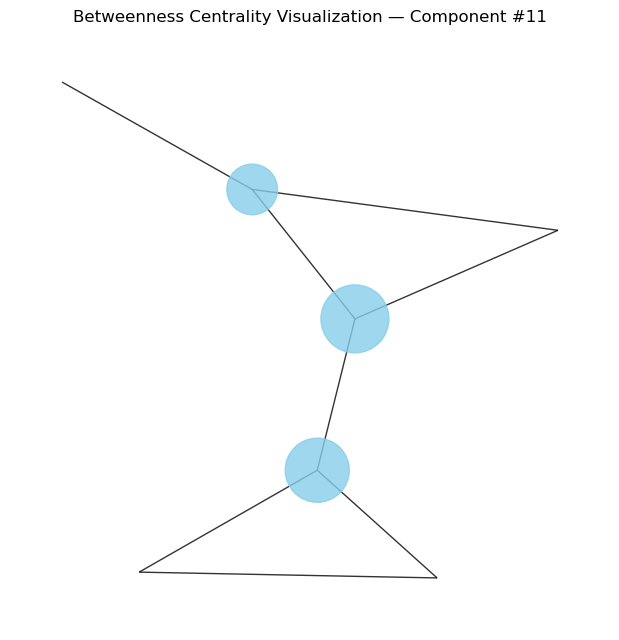

In [12]:
for i, sg3 in enumerate(subgraphs):

    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(sg3, seed=42)

    labels = {
        n: f"{sg3.nodes[n]['song']}"
        for n in sg3.nodes()
    }

    nx.draw(
        sg3,
        pos,
        with_labels=True,
        labels=labels,
        node_size=100,  
        node_color=[sg3.nodes[n]['color'] for n in sg3.nodes()], 
        font_size=6,
        font_weight = "bold",
        width=0.3
    )

    # label_offset = 0.1  # adjust this number to move labels farther right
    # label_pos = {n: (pos[n][0] + label_offset, pos[n][1]) for n in sg3.nodes()}

    # nx.draw_networkx_labels(
    #     sg3,
    #     label_pos,
    #     labels=labels,
    #     font_size=6,
    #     font_weight="bold"
    # )
    
    legend_patches = [
        mpatches.Patch(color=color, label=region)
        for region, color in region_colors.items()
    ]

    plt.legend(
        handles=legend_patches,
        title="Regions",
        loc="upper left",
        bbox_to_anchor=(1, 1)
    )


    plt.title(f"Connected Component #{i} (Nodes: {len(sg3.nodes())})")
    plt.show()
    # Compute betweenness centrality
    bc = nx.betweenness_centrality(sg3, normalized=True)

    bc_sorted = sorted(bc.items(), key=lambda x: x[1], reverse=True)

    # Print the top 5 most central songs
    print(f"\nTop Betweenness Songs in Component #{i}:")
    for node, score in bc_sorted[:5]:
        print(f"{sg3.nodes[node]['song']} — {score:.4f}")
        

    song_names = [sg3.nodes[n]['song'] for n in sg3.nodes()]
    betweenness_values = [bc[n] for n in sg3.nodes()]

    node_sizes = [4000 * bc[n] for n in sg3.nodes()]  # scale betweenness visually

    plt.figure(figsize=(6,6))
    nx.draw(sg3, pos, with_labels=False, node_size=node_sizes, node_color="skyblue", alpha=0.8)
    plt.title(f"Betweenness Centrality Visualization — Component #{i}")
    plt.show()




In [13]:
groups = {}
for node, attrs in map.nodes(data=True):
    region = attrs['region']
    groups.setdefault(region, []).append(node)


In [14]:
import community.community_louvain as louvain

partition = louvain.best_partition(sg)

from collections import defaultdict

coms = defaultdict(list)
for node, com in partition.items():
    coms[com].append(sg.nodes[node]['song'])

for c, songs in coms.items():
    print(f"Community {c}:")
    print(songs)
    print("------")



Community 0:
['Champagne', 'Van Cleef', 'Amor de Fim de Noite']
------
Community 1:
['Eu Vou na Sua Casa', 'Vacilona - Ao Vivo', 'Amor Traumatizado', 'DENTRO DA LAND ROVER - Ao Vivo']
------


In [15]:
region_centers = {
    'United States': (0, 0),
    'Nigeria': (0, 5),
    'Denmark': (5, 5),
    'Japan': (-5, -5),
    'Brazil':(-.3,4)
    
}


In [16]:
import math

pos = {}
for region, nodes in groups.items():
    cx, cy = region_centers[region]
    n = len(nodes)
    radius = 1.0
    for i, node in enumerate(nodes):
        angle = 2*math.pi*i/n
        pos[node] = (cx + radius*math.cos(angle), cy + radius*math.sin(angle))


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25551 (\N{CJK UNIFIED IDEOGRAPH-63CF}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 21764 (\N{CJK UNIFIED IDEOGRAPH-5504}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 32340 (\N{CJK UNIFIED IDEOGRAPH-7E54}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 23019 (\N{CJK UNIF

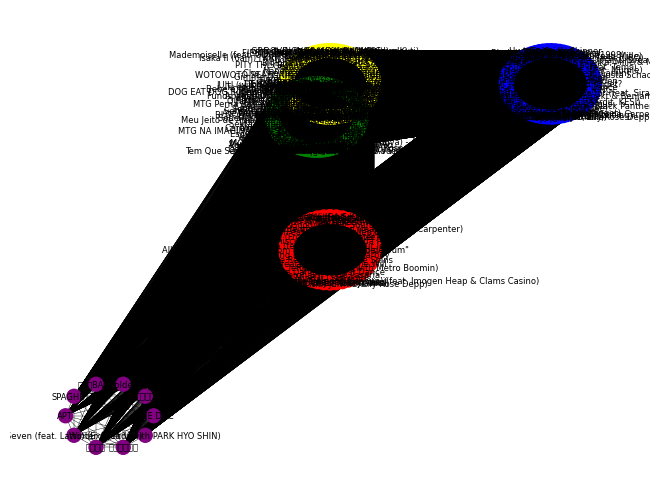

In [17]:
nx.draw(
    map,
    pos,
    with_labels=True,
    labels=nx.get_node_attributes(map, 'song'),
    node_color=[map.nodes[n]['color'] for n in map.nodes()],
    node_size=100,  
    font_size=6,
    width=0.3
)



In [18]:
# Now we are going to run analysis on the data: 

# we wnat to run a degree distribittiom 




Top Betweenness Songs in Component #112:
Eu Vou na Sua Casa — 0.6000
Champagne — 0.5333
DENTRO DA LAND ROVER - Ao Vivo — 0.3333
Van Cleef — 0.0000
Vacilona - Ao Vivo — 0.0000


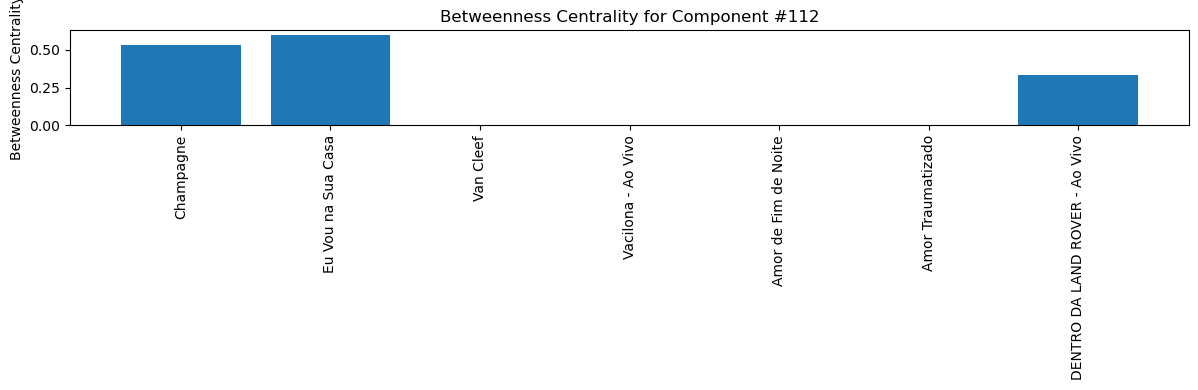

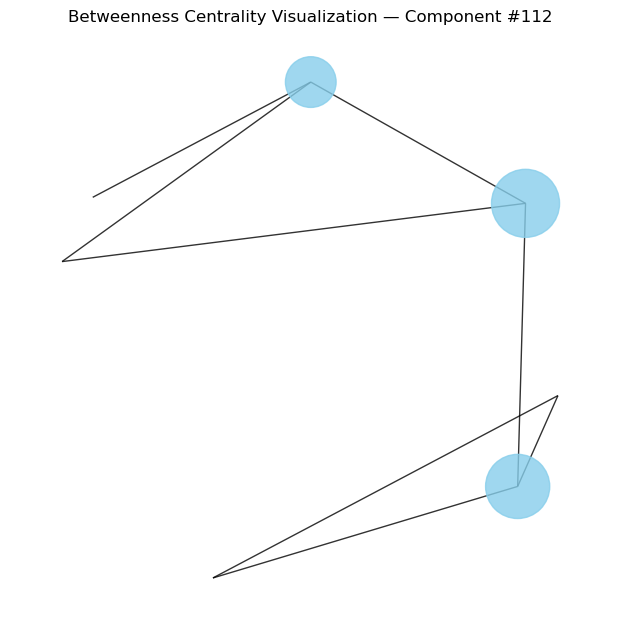

In [19]:
# Compute betweenness centrality
bc = nx.betweenness_centrality(sg, normalized=True)

# Sort from highest to lowest
bc_sorted = sorted(bc.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 most central songs
print(f"\nTop Betweenness Songs in Component #{i}:")
for node, score in bc_sorted[:5]:
    print(f"{sg.nodes[node]['song']} — {score:.4f}")

song_names = [sg.nodes[n]['song'] for n in sg.nodes()]
betweenness_values = [bc[n] for n in sg.nodes()]

plt.figure(figsize=(12, 4))
plt.bar(song_names, betweenness_values)
plt.xticks(rotation=90)
plt.title(f"Betweenness Centrality for Component #{i}")
plt.ylabel("Betweenness Centrality")
plt.tight_layout()
plt.show()

node_sizes = [4000 * bc[n] for n in sg.nodes()]  # scale betweenness visually

plt.figure(figsize=(6,6))
nx.draw(
    sg,
    pos,
    with_labels=False,
    node_size=node_sizes,
    node_color="skyblue",
    alpha=0.8
)
plt.title(f"Betweenness Centrality Visualization — Component #{i}")
plt.show()



In [20]:
region_centers = {
    'United States': (0, 0),
    'Nigeria': (0, 5),
    'Denmark': (5, 5),
    'Japan': (-5, -5),
    'Brazil':(-.3,4)
    
}


In [21]:
import math

pos = {}
for region, nodes in groups.items():
    cx, cy = region_centers[region]
    n = len(nodes)
    radius = 1.0
    for i, node in enumerate(nodes):
        angle = 2*math.pi*i/n
        pos[node] = (cx + radius*math.cos(angle), cy + radius*math.sin(angle))


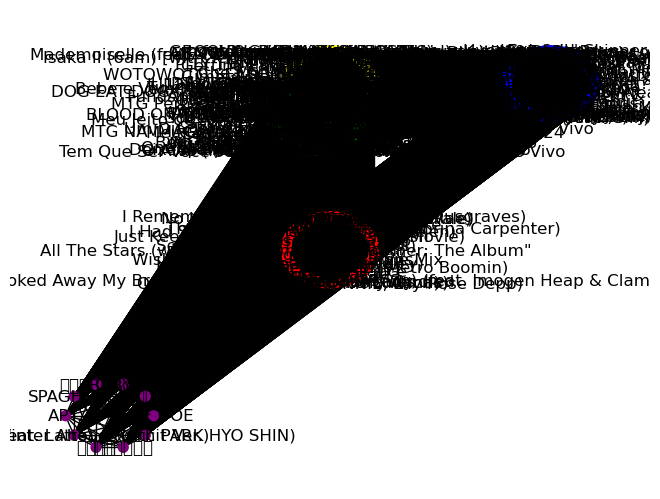

In [22]:
nx.draw(
    map,
    pos,
    with_labels=True,
    labels=nx.get_node_attributes(map, 'song'),
    node_size=50,
    node_color=[map.nodes[n]['color'] for n in map.nodes()]
)


In [23]:
# Now we are going to run analysis on the data: 

# we are to run a degree distribittiom 

